# Regression Example: Predict the Price of a House
Here we will use some housing data to predict the price of a house based on a number of data points.
The data contains a lot of issues we will need to solve before we can get a result:

* String values (all features need to be numbers so we can do math on them)
* null values
* NaN values
* enumerable values (e.g. Sale Condition = ["Normal", "Abnormal", "Partial",...])
* Some of the data points may not be relevant to the sale price
* Some data points might be best combined into a single data point (added or multiplied)

We won't have time to address all of the issues, but let's explore some of them by importing the data and using dataframes and matplotlib to visualize it.

In [1]:
# Import the common packages for exploring Machine Learning
%matplotlib notebook
import numpy as np  # <-- common convention for short names of packages...
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load housing data into DataFrame (Pandas reads & writes CSVs and many other data formats)
# data source: linked from https://ww2.amstat.org/publications/jse/v19n3/decock.pdf 

# Download this file to our Jupyter filesystem
!wget http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt;
# file is 'Tab Separated' with a generic extension, so tell Pandas which separator to use:  \t
df = pd.read_csv('AmesHousing.txt',sep='\t');

--2018-03-03 02:09:52--  http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving www.amstat.org (www.amstat.org)... 50.205.225.65
Connecting to www.amstat.org (www.amstat.org)|50.205.225.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt [following]
--2018-03-03 02:09:52--  https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt
Resolving ww2.amstat.org (ww2.amstat.org)... 50.205.225.74
Connecting to ww2.amstat.org (ww2.amstat.org)|50.205.225.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 963738 (941K) [text/plain]
Saving to: ‘AmesHousing.txt.8’

AmesHousing.txt.8   100%[===================>] 941.15K   932KB/s    in 1.0s    

2018-03-03 02:09:54 (932 KB/s) - ‘AmesHousing.txt.8’ saved [963738/963738]



In [3]:
# DataFrames in Pandas are easy to sample or use head(n) or tail(n)

# df.head(3)
# df.tail(3)
df.sample(10)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
256     257  907125090           85        RL          82.0     11105   Pave   
1312   1313  902304060          190        RM          60.0      9600   Pave   
378     379  527354200           20        RL          80.0     11088   Pave   
107     108  533253210          120        RL          40.0      3880   Pave   
1073   1074  528186080          120        RL          63.0      8849   Pave   
1552   1553  910226040           50        RM          75.0      9000   Pave   
1597   1598  923225370          180        RM          21.0      1596   Pave   
1263   1264  535426260           20        RL           NaN     10920   Pave   
67       68  528456160           20        FV          92.0      9215   Pave   
2614   2615  535404080           20        RL          73.0      7100   Pave   

     Alley Lot Shape Land Contour    ...     Pool Area Pool QC  Fence  \
256    NaN       Reg          Lvl    ...             0     NaN  GdPrv   
1312  Grvl       Reg          Lvl    ...             0     NaN    NaN   
378    NaN       Reg          Lvl    ...             0     NaN    NaN   
107    NaN       IR1          Lvl    ...             0     NaN    NaN   
1073   NaN       IR1          Lvl    ...             0     NaN    NaN   
1552   NaN       Reg          Lvl    ...             0     NaN    NaN   
1597   NaN       Reg          Lvl    ...             0     NaN   GdWo   
1263   NaN       IR1          Lvl    ...             0     NaN   GdWo   
67     NaN       Reg          Lvl    ...             0     NaN    NaN   
2614   NaN       IR1          Lvl    ...             0     NaN    NaN   

     Misc Feature Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  \
256           NaN        0       7    2010       WD           Normal   
1312          NaN        0       4    2008       WD           Normal   
378           NaN        0       5    2009       WD           Normal   
107           NaN        0       1    2010       WD           Normal   
1073          NaN        0       7    2008       WD           Normal   
1552          NaN        0       1    2008       WD           Normal   
1597          NaN        0       7    2008       WD           Normal   
1263          NaN        0       5    2008       WD           Normal   
67            NaN        0       4    2010       New         Partial   
2614          NaN        0       7    2006       WD           Normal   

      SalePrice  
256      159000  
1312     130000  
378      184000  
107      206000  
1073     266000  
1552     165500  
1597      94900  
1263     157000  
67       204500  
2614     129900  

[10 rows x 82 columns]

In [4]:
# Wow, 82 is lots of columns - let's sort them so we can find what we're looking for more easily
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo Sold', 'Neighborhood', 'Open Porch S

In [5]:
# Maybe we want to grab just a subset of data columns - it's easy with Pandas. 
# Don't forget the double [[]] syntax for multiple selections

# let's start with the easy stuff and grab only the numeric columns
df2 = df[['SalePrice','Lot Area','Bedroom AbvGr','Year Built','Yr Sold','1st Flr SF', '2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2']]
df2.head(3)

SalePrice  Lot Area  Bedroom AbvGr  Year Built  Yr Sold  1st Flr SF  \
0     215000     31770              3        1960     2010        1656   
1     105000     11622              2        1961     2010         896   
2     172000     14267              3        1958     2010        1329   

   2nd Flr SF  BsmtFin SF 1  BsmtFin SF 2  
0           0         639.0           0.0  
1           0         468.0         144.0  
2           0         923.0           0.0

In [6]:
# Maybe you want to use Pandas Dataframes to engineer a new aggregate feature column
# It's easy to do opeations across columns (eg. add all the Square Footage columns into a new one 'Total SF')
df3 = pd.DataFrame(df2['1st Flr SF']+df2['2nd Flr SF']+df2['BsmtFin SF 1']+df2['BsmtFin SF 2'], columns=['Total SF'])
df3.head(5)

Total SF
0    2295.0
1    1508.0
2    2252.0
3    3175.0
4    2420.0

In [7]:
# Combining DataFrame's is easy to
# use 'axis=1' for adding columns (features); 'axis=0' for more rows (examples)
df4 = pd.concat([df2,df3],axis=1) 
df4.sample(3) # <-- now we have a new 'Total SF' feature column appended

SalePrice  Lot Area  Bedroom AbvGr  Year Built  Yr Sold  1st Flr SF  \
2699     150000     11136              4        1964     2006        1921   
2385     326000     16033              3        2004     2006        1850   
810      118858      7018              4        1979     2009        1535   

      2nd Flr SF  BsmtFin SF 1  BsmtFin SF 2  Total SF  
2699           0           0.0           0.0    1921.0  
2385           0        1261.0           0.0    3111.0  
810            0           0.0           0.0    1535.0

## Let's Try a Simple Linear Regression

In [8]:
# Let's see if we can predict a Sale Price based on single feature 'Gross Living Area'
# Create a new DataFrame with only the data we need
data = df[['SalePrice','Gr Liv Area']]
data.head(5)

SalePrice  Gr Liv Area
0     215000         1656
1     105000          896
2     172000         1329
3     244000         2110
4     189900         1629

In [9]:
# sklearn complains if these are shape [100,] vs [100,1]
# just one of the many gotchas you'll find :)
X = data['Gr Liv Area'].values.reshape(-1,1) 
# Y is typically used for the Truth Labels
Y = data['SalePrice'].values.reshape(-1,1)

<IPython.core.display.Javascript object>


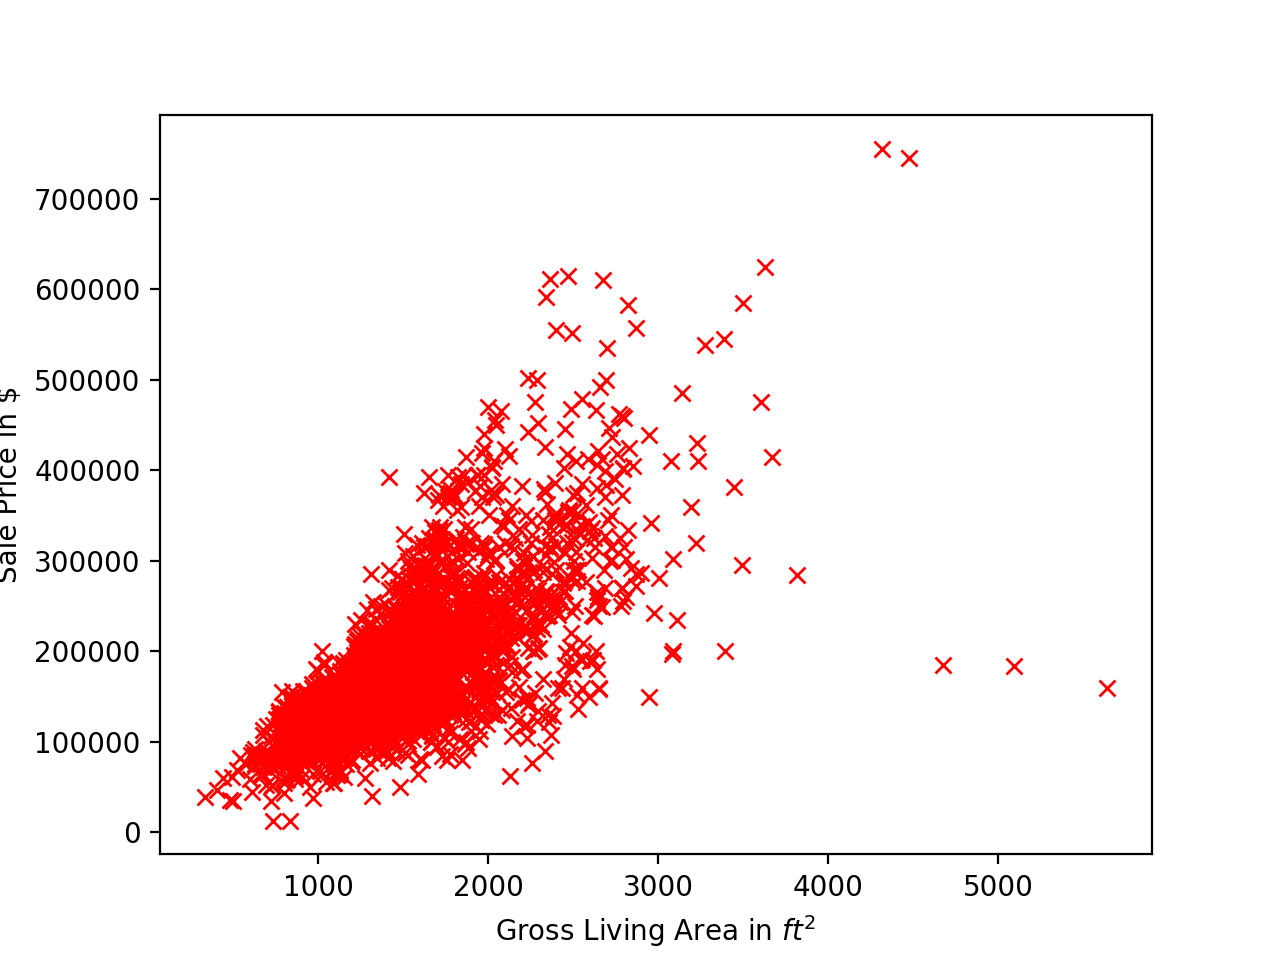

In [22]:
%matplotlib notebook
# Let's plot Square Foot vs Sale Price to understand our data
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')
plt.plot(X,Y,'rx');

## Let's Split the Data so We Can Evaluate How We'll We Can Predict

In [23]:
# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
# By default, train_test_split will split the data into 75%/25% train/test
housing_X_train, housing_X_test, housing_Y_train, housing_Y_test = train_test_split(X,Y)
print('housing_X_train',len(housing_X_train),'examples')
print('housing_X_test',len(housing_X_test),'examples')
print('housing_Y_train',len(housing_Y_train),'examples')
print('housing_Y_test',len(housing_Y_test),'examples')

# Create linear regression object
regr = linear_model.LinearRegression(normalize=True)
# regr = linear_model.SGDRegressor(n_iter=100)

housing_X_train 2197 examples
housing_X_test 733 examples
housing_Y_train 2197 examples
housing_Y_test 733 examples


In [24]:
# The fit function will train the model using the training set
regr.fit(housing_X_train, housing_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [25]:
# Make predictions using the testing set
housing_Y_pred = regr.predict(housing_X_test)

# The coefficients
# print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(housing_Y_test, housing_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_Y_test, housing_Y_pred))

Mean squared error: 3597440940.81
Variance score: 0.48


<IPython.core.display.Javascript object>


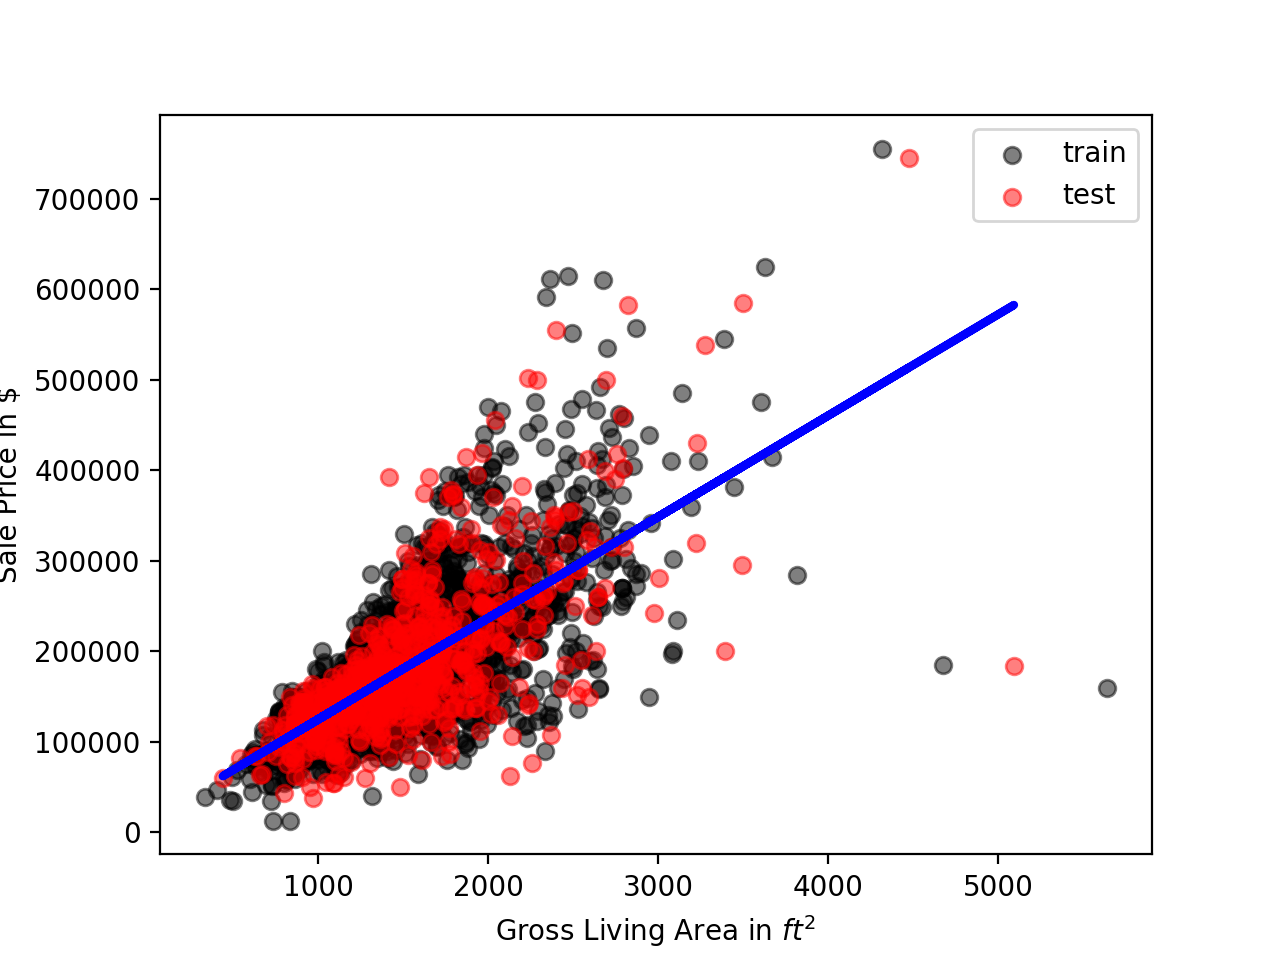

In [26]:
%matplotlib notebook
# Plot outputs
plt.scatter(housing_X_train, housing_Y_train, alpha=.5, color='black', label='train')
plt.scatter(housing_X_test, housing_Y_test, alpha=.5, color='red', label='test')
plt.plot(housing_X_test, housing_Y_pred,color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')

plt.show();

This looks OK, but how well did we really do?

Let's create a histogram showing how off we were from the truth.

If our model is good, we'll have a lot of hits in the middle and a nice tall bell curve. 

<IPython.core.display.Javascript object>


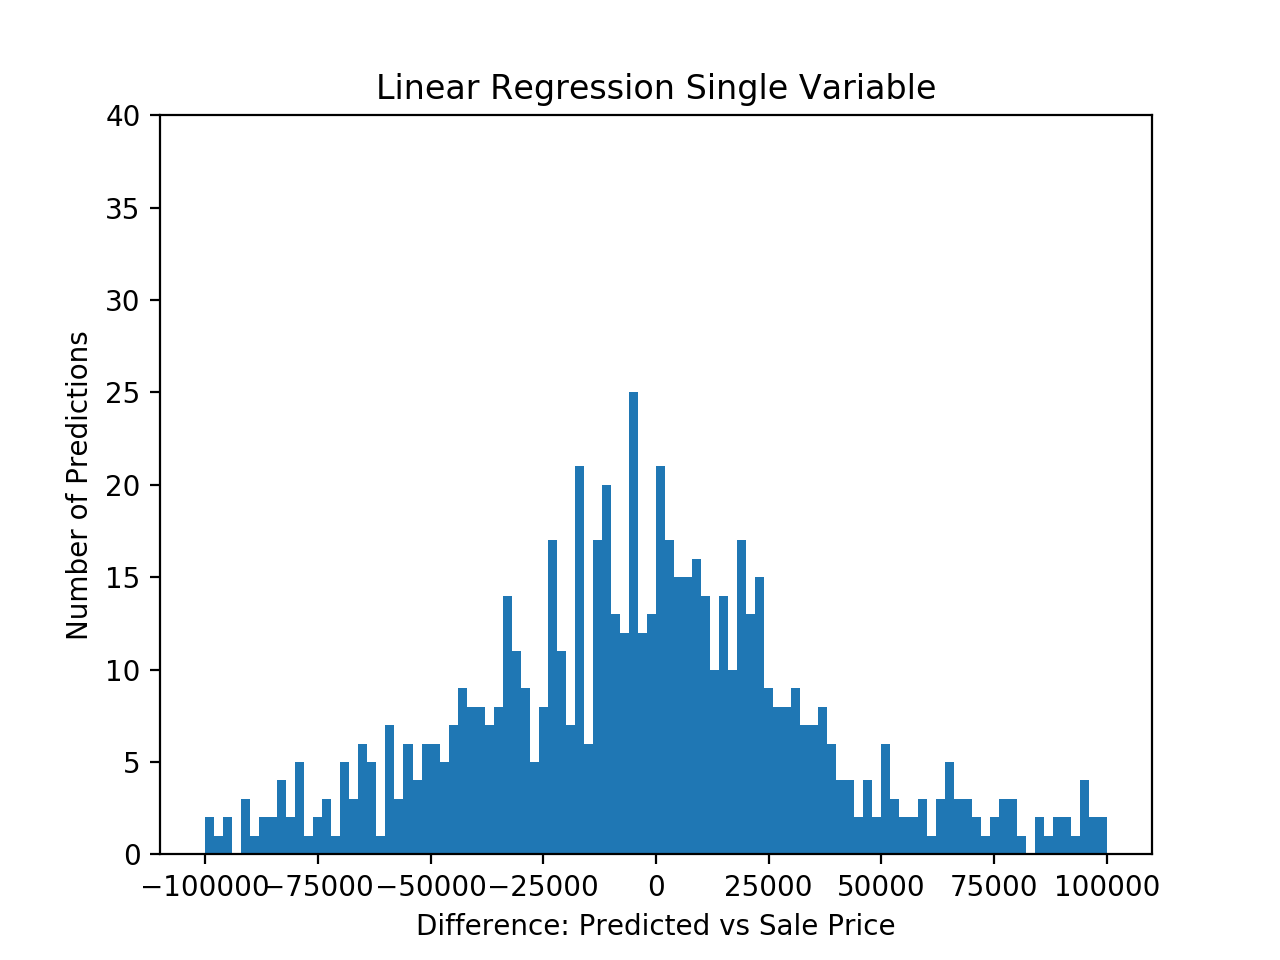

In [27]:
%matplotlib notebook

# Plot hist of predictions vs actual
y_lr = np.reshape(housing_Y_test,housing_Y_test.shape[0])
yhat_lr = np.reshape(housing_Y_pred,housing_Y_pred.shape[0])
ydiff_lr = np.subtract(y_lr,yhat_lr)

plt.ylim([0,40])
plt.hist(ydiff_lr,bins=100,range=[-100000, 100000])
plt.title('Linear Regression Single Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show();

This doesn't look that great.

We can do better if we consider multiple features of data and use a more complex model.

## Adding a Neural Network

For simplicity, let's start with just using all of the numerical columns in the data.
We aren't going to worry about featurizing non-numeric fields yet since there is probably useful data already in the dataset that won't require a lot of work to setup.

There are a lot of neural networks and tools to choose from. In this example, we are going to use an [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), built into scikit-learn

In [32]:
# sklearn.neural_network.MLPRegressor
# sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
# random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
# early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
from sklearn.neural_network import MLPRegressor

# Use all numerical columns to predict 'SalePrice'
columns = list([
    '1st Flr SF', 
    '2nd Flr SF', 
    '3Ssn Porch', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath', 
    'Bsmt Unf SF', 
    'BsmtFin SF 1',
    'BsmtFin SF 2',
    'Enclosed Porch',
#     'Fireplaces',
    'Full Bath',
    'Garage Area', 
    'Garage Cars',
    'Garage Yr Blt', 
    'Gr Liv Area',
#     'Half Bath', 
#     'Kitchen AbvGr',
    'Lot Area',
    'Lot Frontage', 
#     'Low Qual Fin SF',
#     'Mas Vnr Area',
    'Mo Sold', 
#     'Open Porch SF',
    'Pool Area',
    'TotRms AbvGrd', 
    'Total Bsmt SF',
    'Wood Deck SF', 
    'Year Built', 
#     'Year Remod/Add', 
    'Yr Sold'
])
print(columns)
# Create new dataframe with columns
X_NN = df[columns]
print(X_NN.shape)
#sklearn complains if these are shape [100,] vs [100,1]
Y_NN = df['SalePrice'].values.reshape(-1,1)
print(Y_NN.shape)
# remove NaN values & replace with 0's
X_NN = X_NN.fillna(0)
X_NN = X_NN.values # convert to plain NumPy array

# TODO: scaling & centering data
# scale & center our data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_NN)

# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
housing_X_train_nn, housing_X_test_nn, housing_Y_train_nn, housing_Y_test_nn = train_test_split(X_scaled,Y_NN)
print('housing_X_train',len(housing_X_train_nn),'examples')
print('housing_X_test',len(housing_X_test_nn),'examples')
print('housing_Y_train',len(housing_Y_train_nn),'examples')
print('housing_Y_test',len(housing_Y_test_nn),'examples')

['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Enclosed Porch', 'Full Bath', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Gr Liv Area', 'Lot Area', 'Lot Frontage', 'Mo Sold', 'Pool Area', 'TotRms AbvGrd', 'Total Bsmt SF', 'Wood Deck SF', 'Year Built', 'Yr Sold']
(2930, 24)
(2930, 1)
housing_X_train 2197 examples
housing_X_test 733 examples
housing_Y_train 2197 examples
housing_Y_test 733 examples


In [33]:

# Explore settings logarithmically (0.1, 0.01, 0.001, 0.00001)
nn_regr = MLPRegressor(hidden_layer_sizes=(20,5), learning_rate_init=0.01, activation='relu',max_iter=2000,verbose=True)

# Train it
nn_regr.fit(housing_X_train_nn,housing_Y_train_nn.reshape(housing_Y_train_nn.size))

# Make predictions using the testing set
housing_Y_pred_nn = nn_regr.predict(housing_X_test_nn)

Iteration 1, loss = 20025728013.67446899
Iteration 2, loss = 20023927325.87944031
Iteration 3, loss = 20019710467.95964813
Iteration 4, loss = 20011126845.87042618
Iteration 5, loss = 19994918763.11191940
Iteration 6, loss = 19967723753.78342438
Iteration 7, loss = 19923732752.65644073
Iteration 8, loss = 19859671566.08225250
Iteration 9, loss = 19768698174.97044373
Iteration 10, loss = 19648701689.45433807
Iteration 11, loss = 19489356738.18004990
Iteration 12, loss = 19290891105.91774368
Iteration 13, loss = 19051976214.15306091
Iteration 14, loss = 18760956383.26716995
Iteration 15, loss = 18409505091.94836426
Iteration 16, loss = 18008005061.37861252
Iteration 17, loss = 17559512411.24576569
Iteration 18, loss = 17041144070.90212059
Iteration 19, loss = 16486551897.55848503
Iteration 20, loss = 15857784272.19013596
Iteration 21, loss = 15189836104.83619118
Iteration 22, loss = 14473893141.50448036
Iteration 23, loss = 13749191367.17214394
Iteration 24, loss = 12963052835.90814400
I

Iteration 222, loss = 709644536.59494591
Iteration 223, loss = 710020903.17624557
Iteration 224, loss = 706882848.63255441
Iteration 225, loss = 704960755.67379677
Iteration 226, loss = 704554540.54508126
Iteration 227, loss = 702672486.22447991
Iteration 228, loss = 702283528.21941388
Iteration 229, loss = 701738282.38319540
Iteration 230, loss = 701107794.81268108
Iteration 231, loss = 698573696.92759085
Iteration 232, loss = 696120297.93090081
Iteration 233, loss = 695214296.00370228
Iteration 234, loss = 693410845.75782621
Iteration 235, loss = 692312419.31874657
Iteration 236, loss = 691118058.77848077
Iteration 237, loss = 690315947.20118749
Iteration 238, loss = 689708687.00132239
Iteration 239, loss = 687731087.26788783
Iteration 240, loss = 686384225.53739452
Iteration 241, loss = 685306079.89941990
Iteration 242, loss = 684121432.15110016
Iteration 243, loss = 683055764.98865926
Iteration 244, loss = 681977312.66631401
Iteration 245, loss = 681071493.82280731
Iteration 246, l

In [34]:
print("Mean squared error: %.2f" % mean_squared_error(housing_Y_test_nn, housing_Y_pred_nn))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_Y_test_nn, housing_Y_pred_nn))

Mean squared error: 1958465310.37
Variance score: 0.59


In [35]:
# Variance scores or Linear Regression vs NN
score1 = r2_score(housing_Y_test, housing_Y_pred)
score2 = r2_score(housing_Y_test_nn, housing_Y_pred_nn)
print('Linear Regression (Single variable) VARIANCE',round(score1,2))
print('NN MLP Regression (Multi variable) VARIANCE',round(score2,2))
answer = score2/score1
print("\nNN multivarate model Variance is {:0.2f}x better than 1 variable linear regresson".format(answer))
answer = ((score2-score1)/score1)*100
print("NN multivarate model Variance is {:0.0f}% better than 1 variable linear regresson\n".format(answer))


Linear Regression (Single variable) VARIANCE 0.48
NN MLP Regression (Multi variable) VARIANCE 0.59

NN multivarate model Variance is 1.24x better than 1 variable linear regresson
NN multivarate model Variance is 24% better than 1 variable linear regresson



## So How is That Bell Curve?

<IPython.core.display.Javascript object>


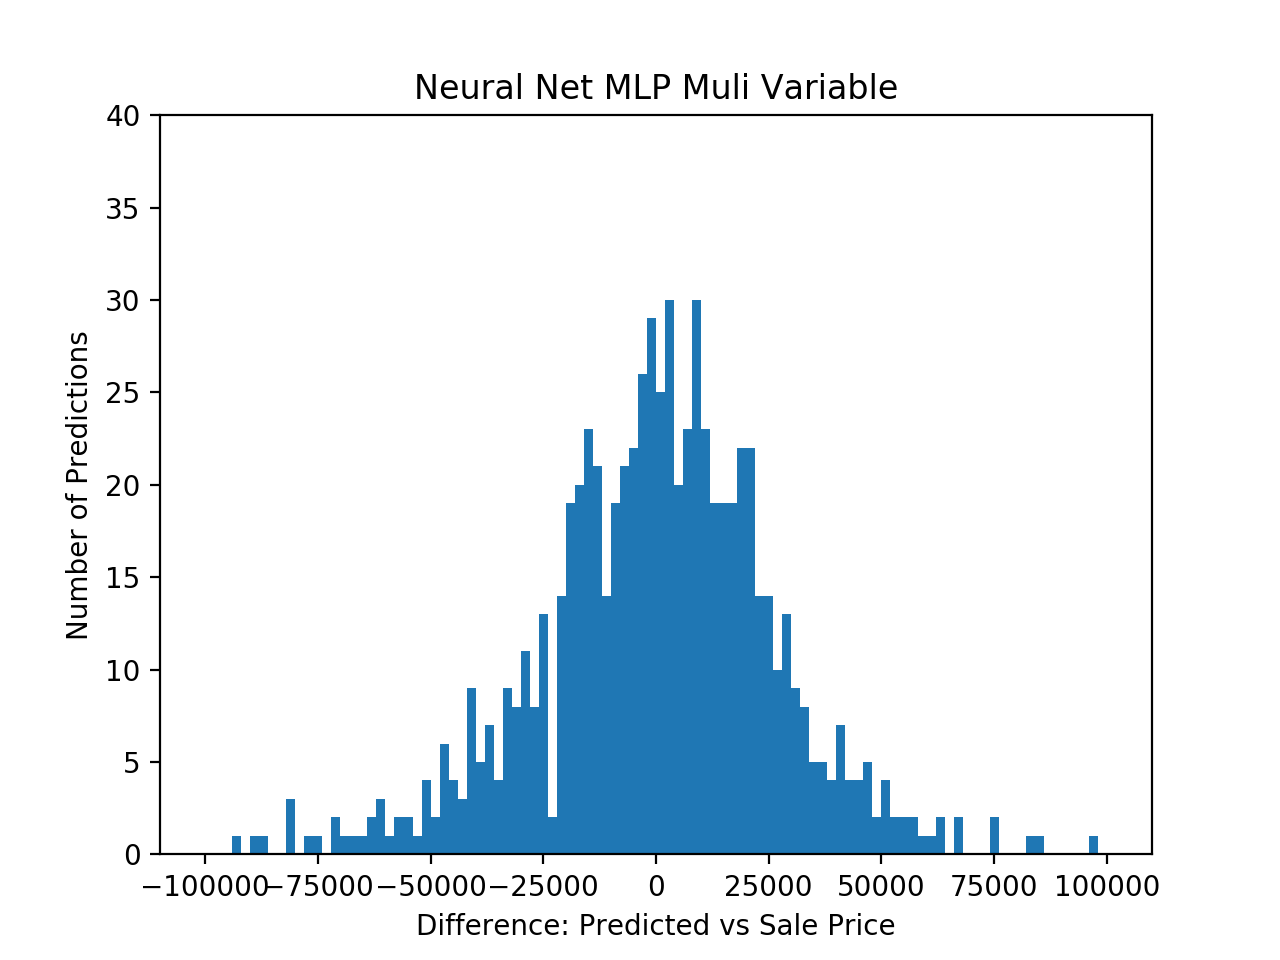

In [36]:
%matplotlib notebook

# Plot histogram of difference between predicted & actual sale price outputs
y_nn = np.reshape(housing_Y_test_nn,housing_Y_test_nn.shape[0])
yhat_nn = np.reshape(housing_Y_pred_nn,housing_Y_pred_nn.shape[0])
ydiff = np.subtract(y_nn,yhat_nn)

plt.ylim([0,40])
plt.hist(ydiff,bins=100,range=[-100000, 100000])

plt.title('Neural Net MLP Muli Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show();

That's significantly better!

But can we do even better?

## Let's Visualize The Relationship Each Feature Has With Price

We can plot a chart of each feature mapped to the sales price to easily see how a feature corresponds to the rising price.

If a feature doesn't show a correlation with increased price, this is not likely a good feature for our model to consider--and we can omit it from the data.

24


<IPython.core.display.Javascript object>


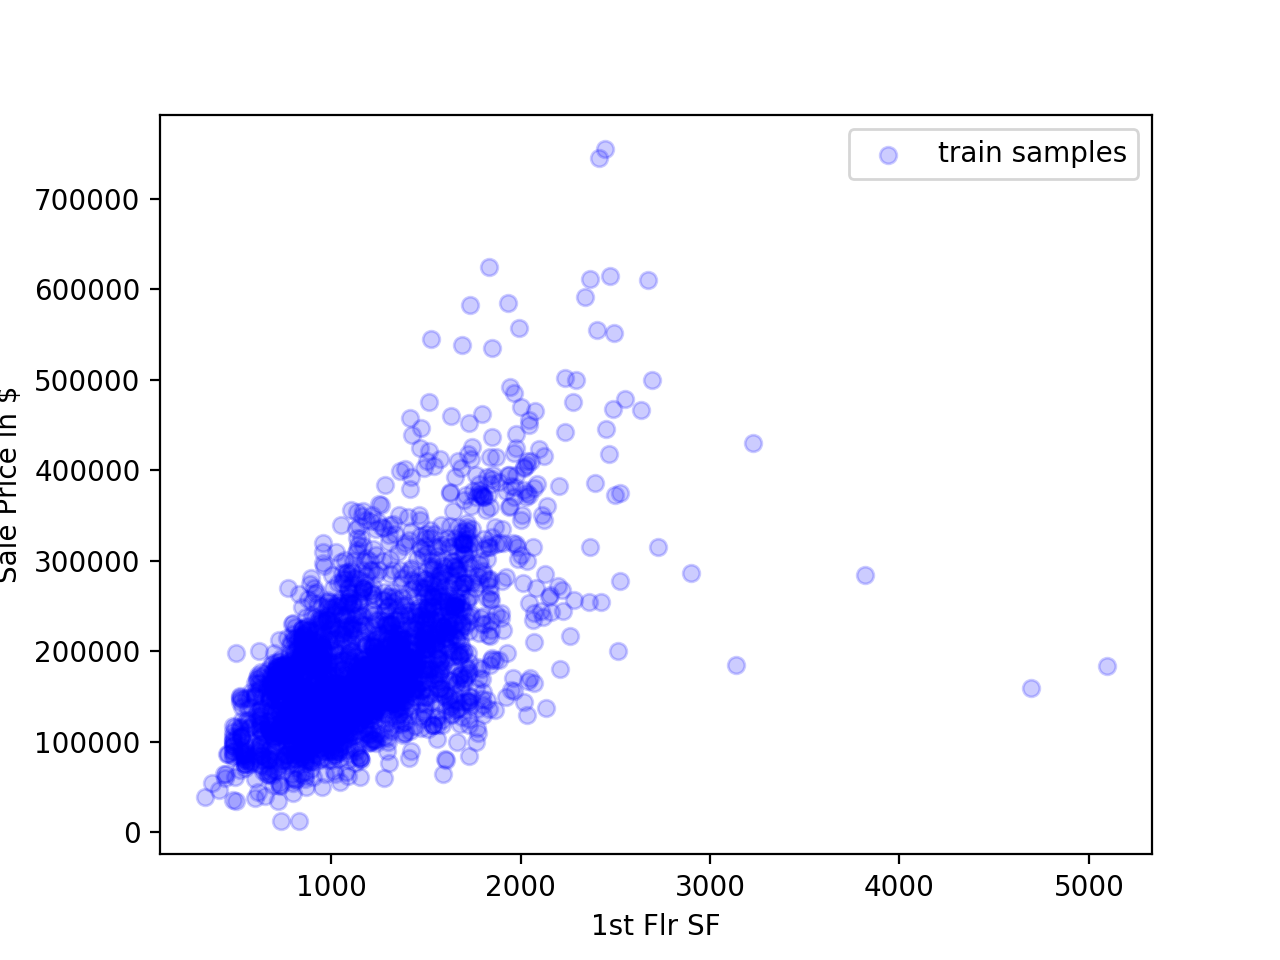

<IPython.core.display.Javascript object>


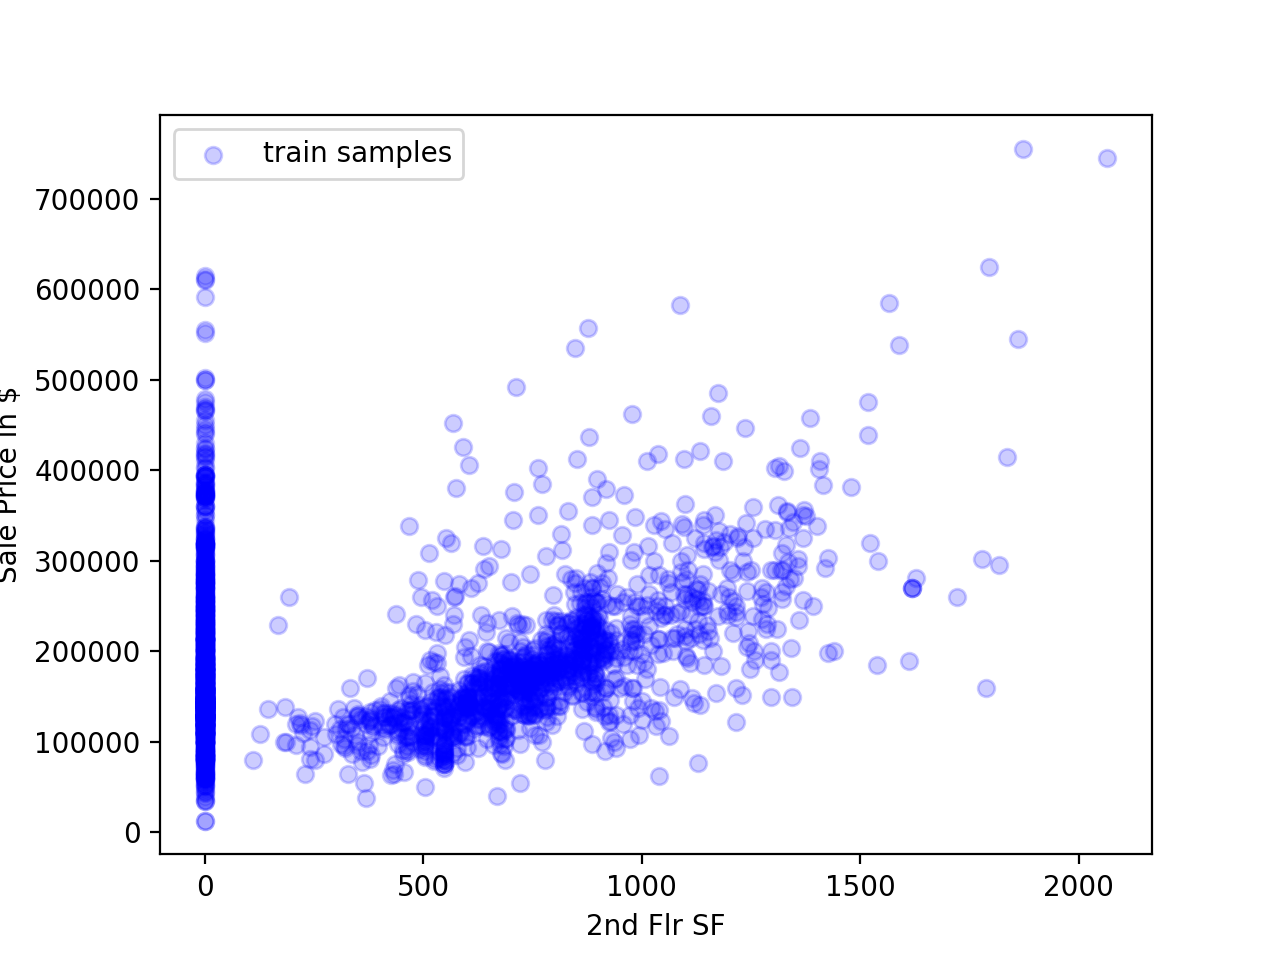

<IPython.core.display.Javascript object>


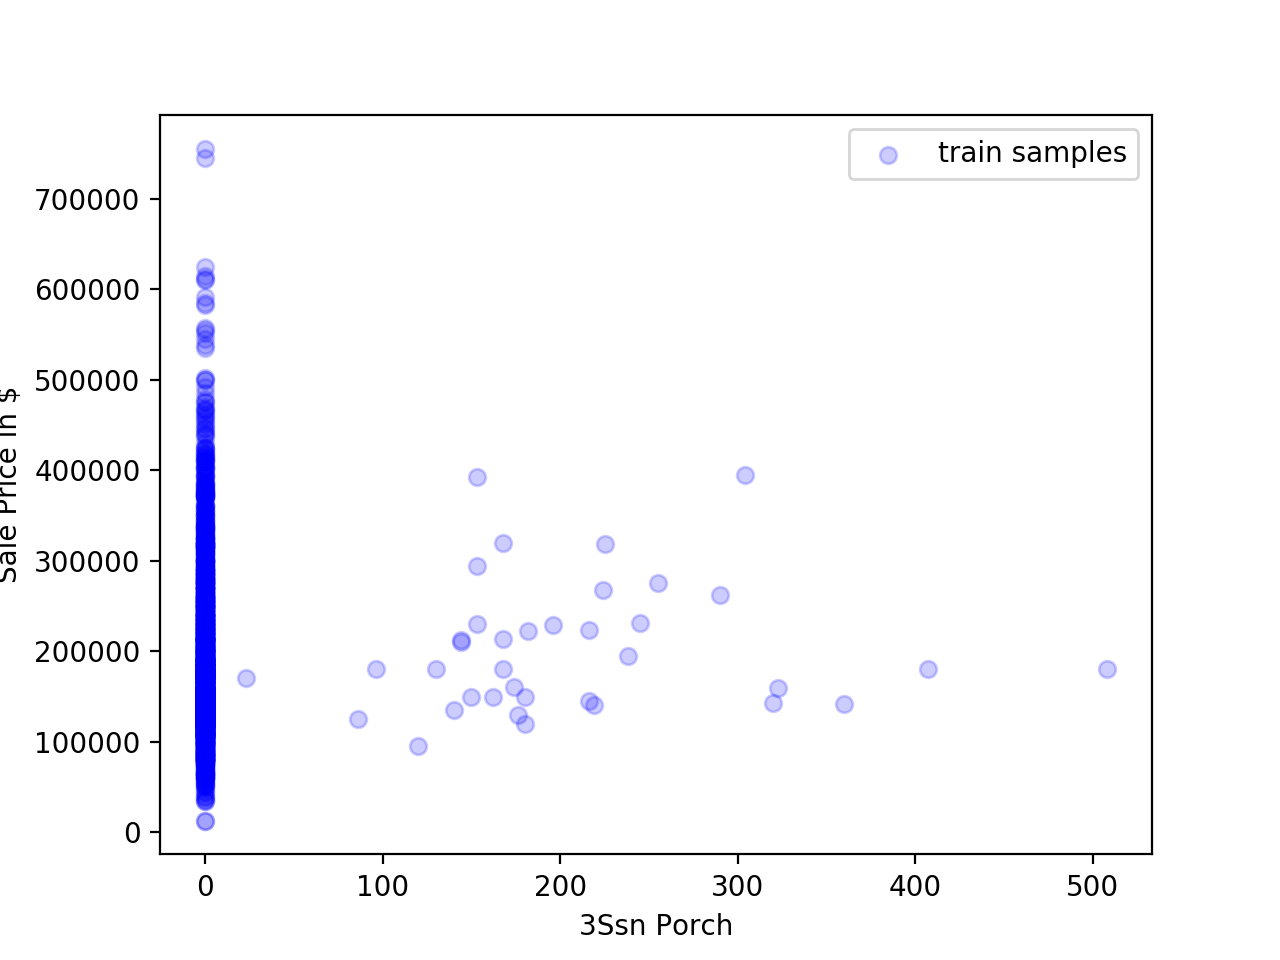

<IPython.core.display.Javascript object>


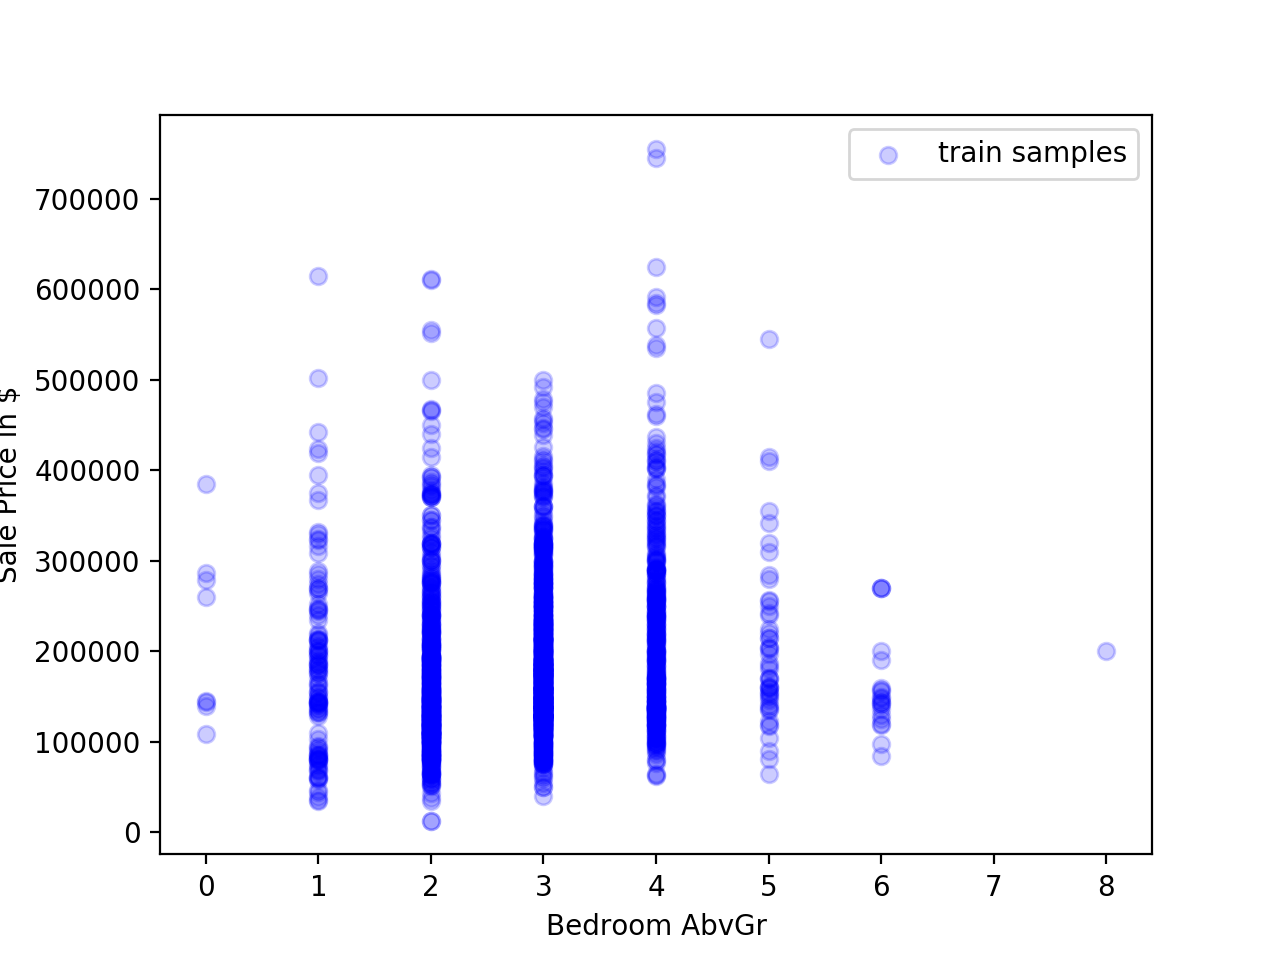

<IPython.core.display.Javascript object>


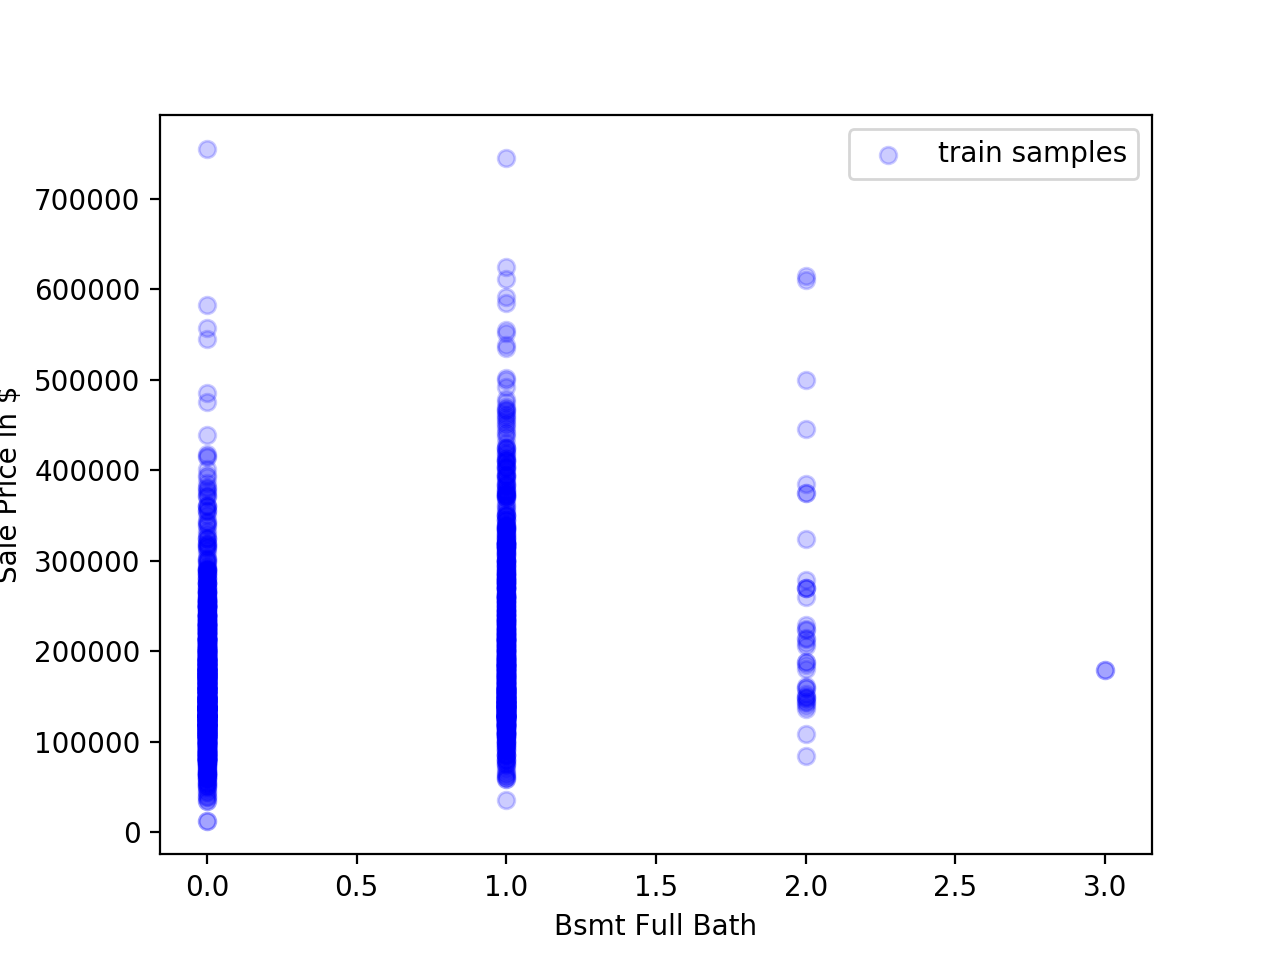

<IPython.core.display.Javascript object>


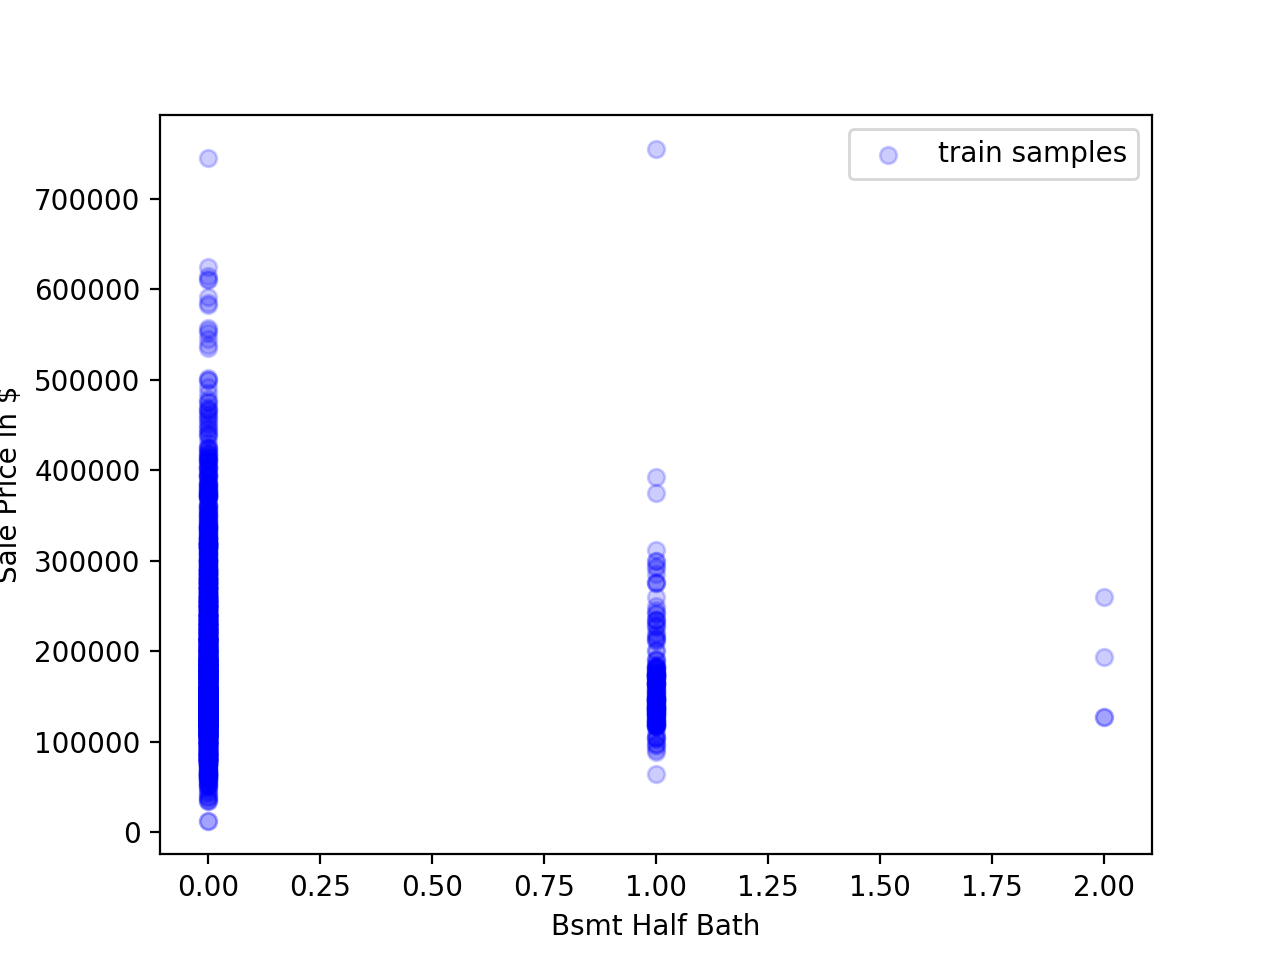

<IPython.core.display.Javascript object>


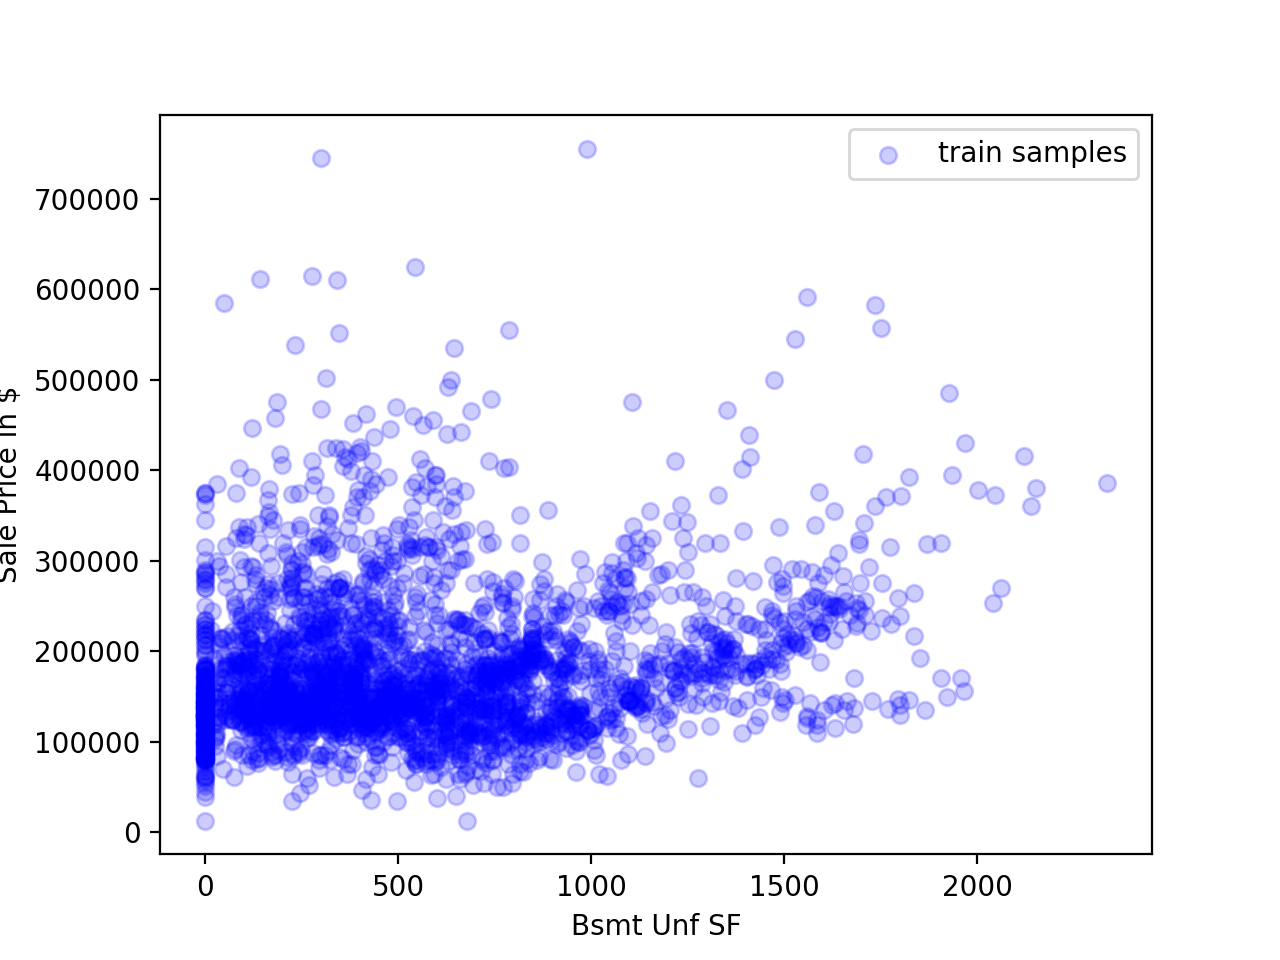

<IPython.core.display.Javascript object>


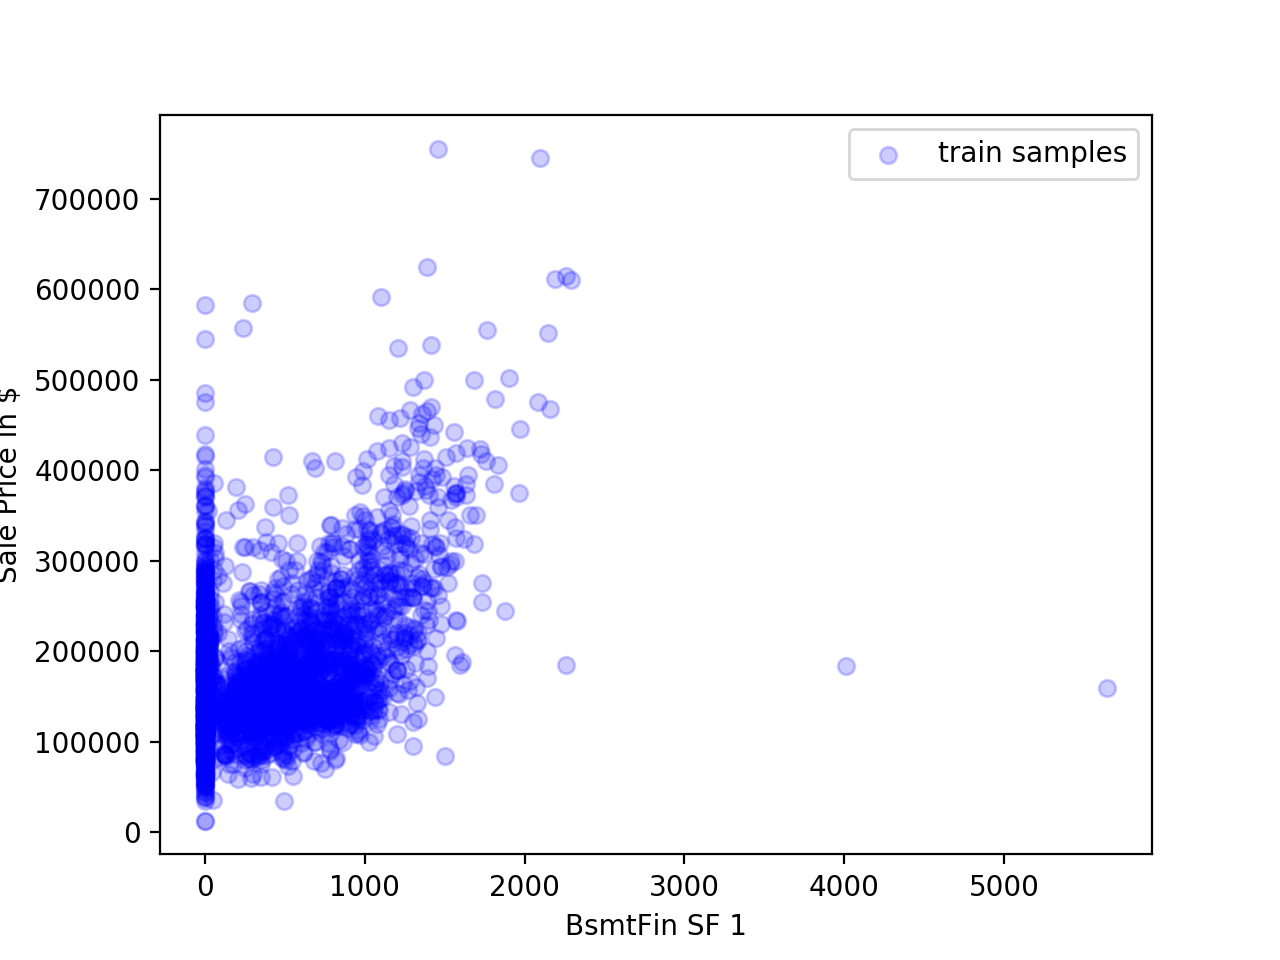

<IPython.core.display.Javascript object>


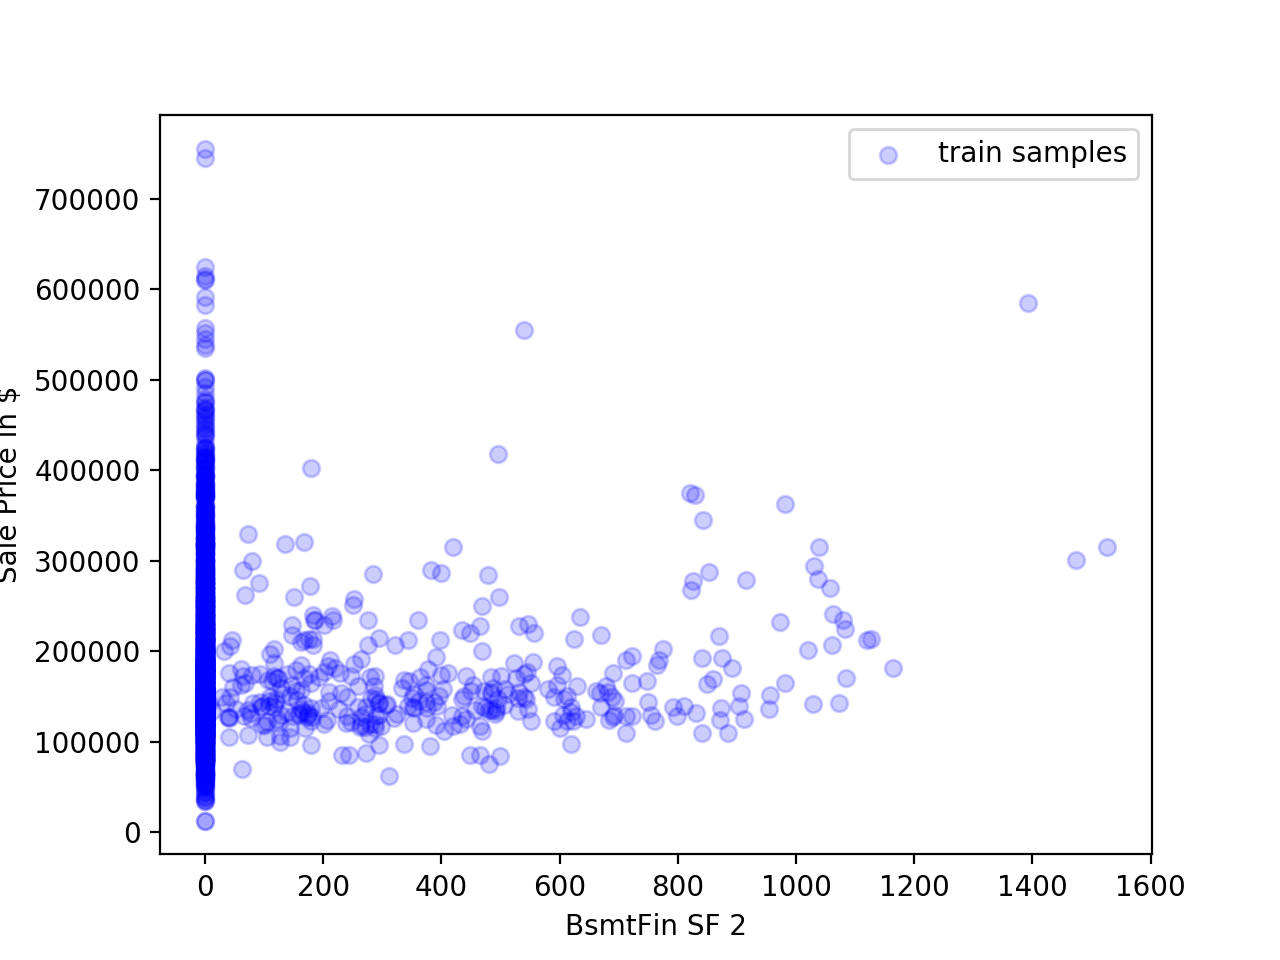

<IPython.core.display.Javascript object>


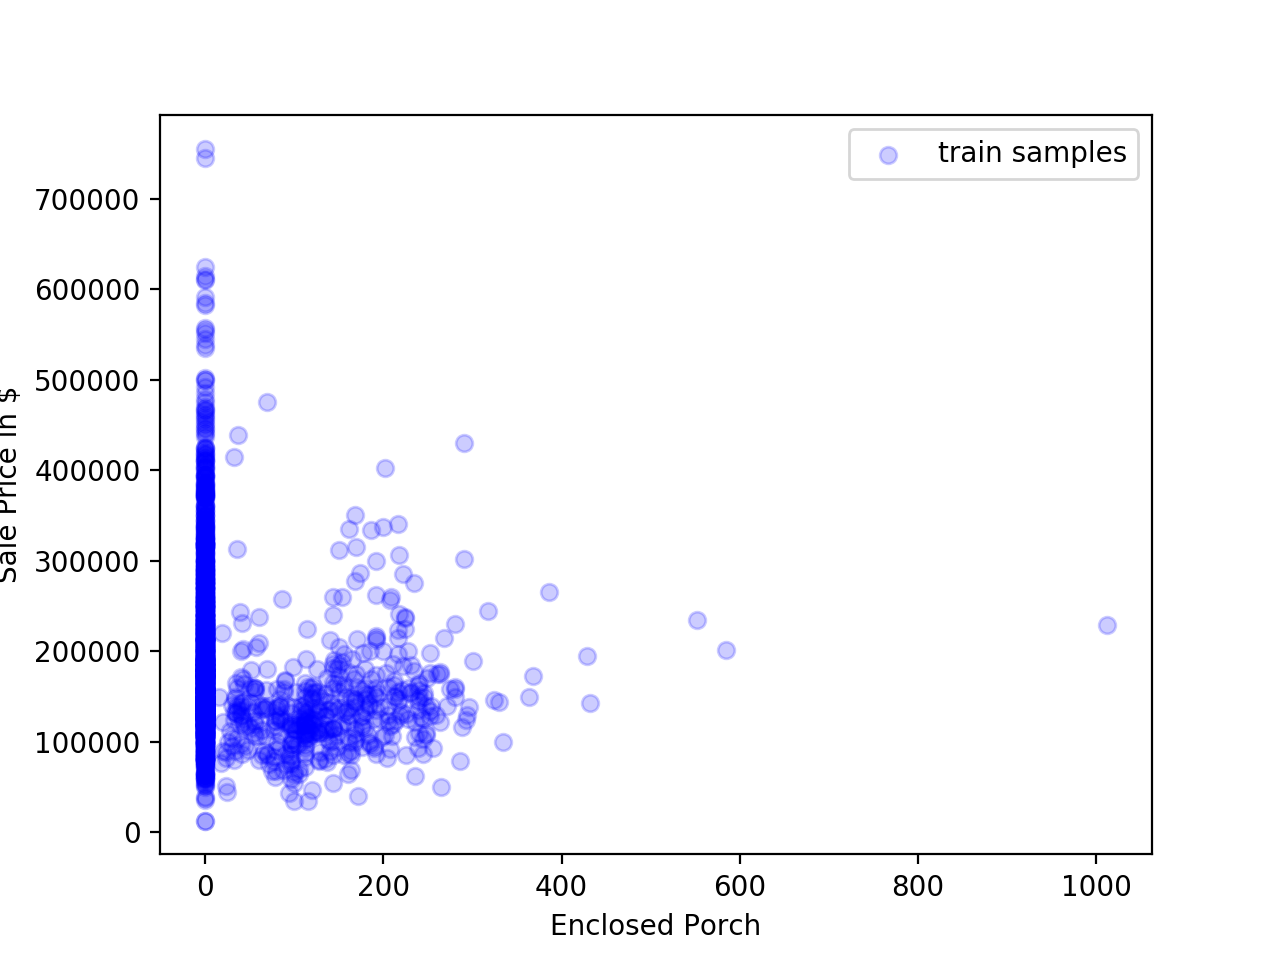

<IPython.core.display.Javascript object>


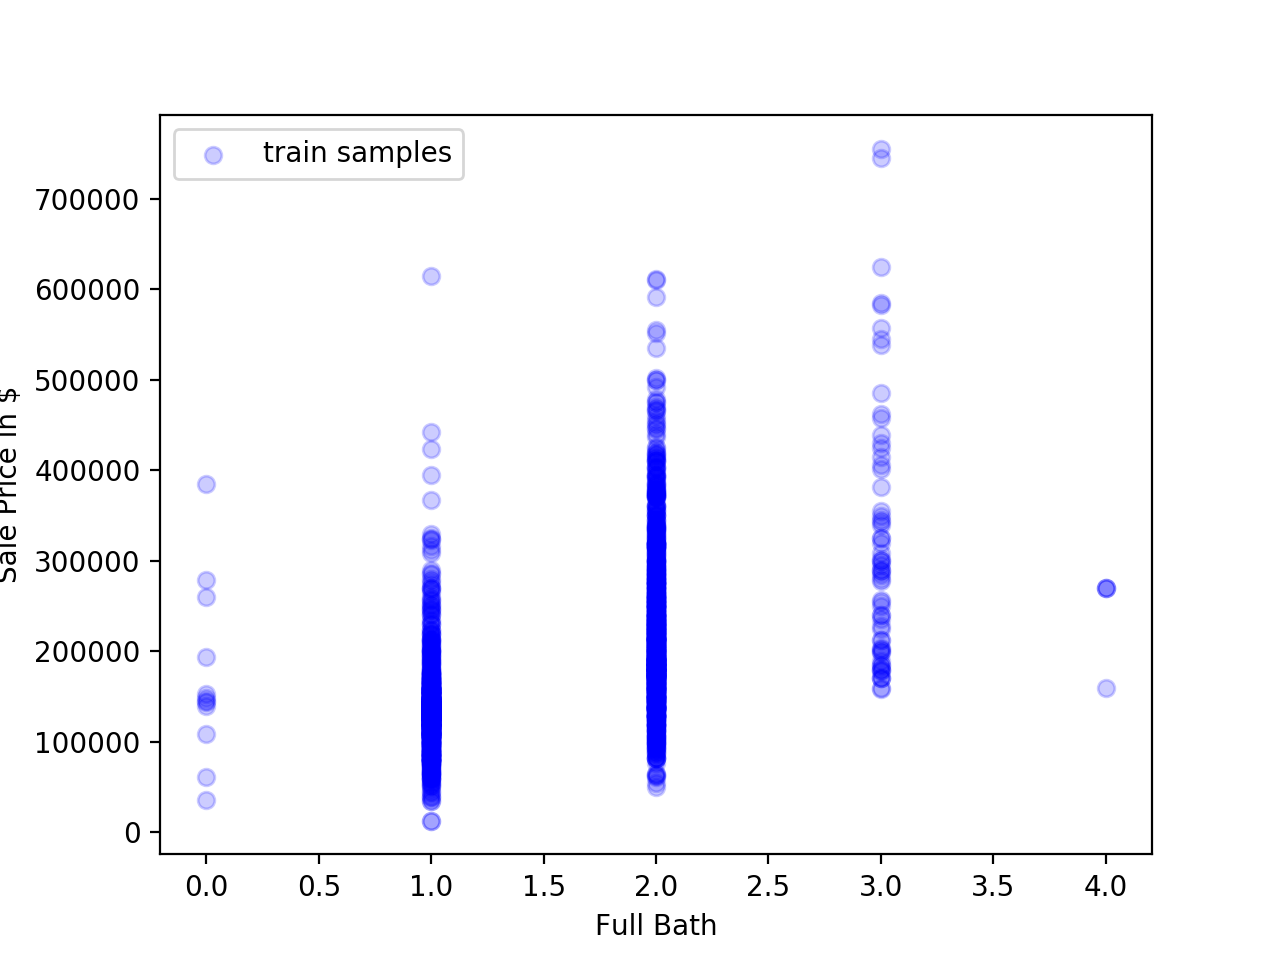

<IPython.core.display.Javascript object>


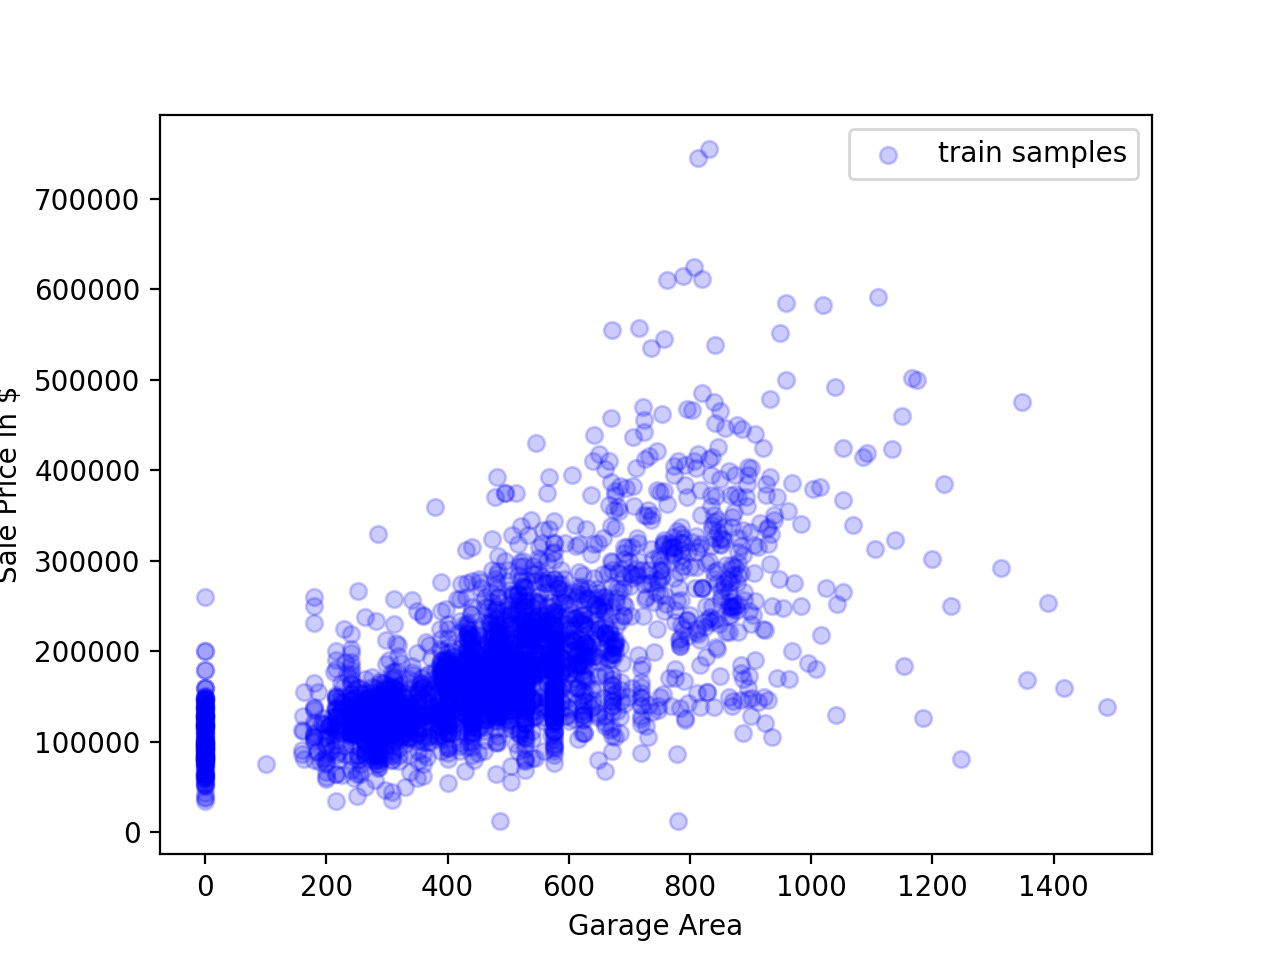

<IPython.core.display.Javascript object>


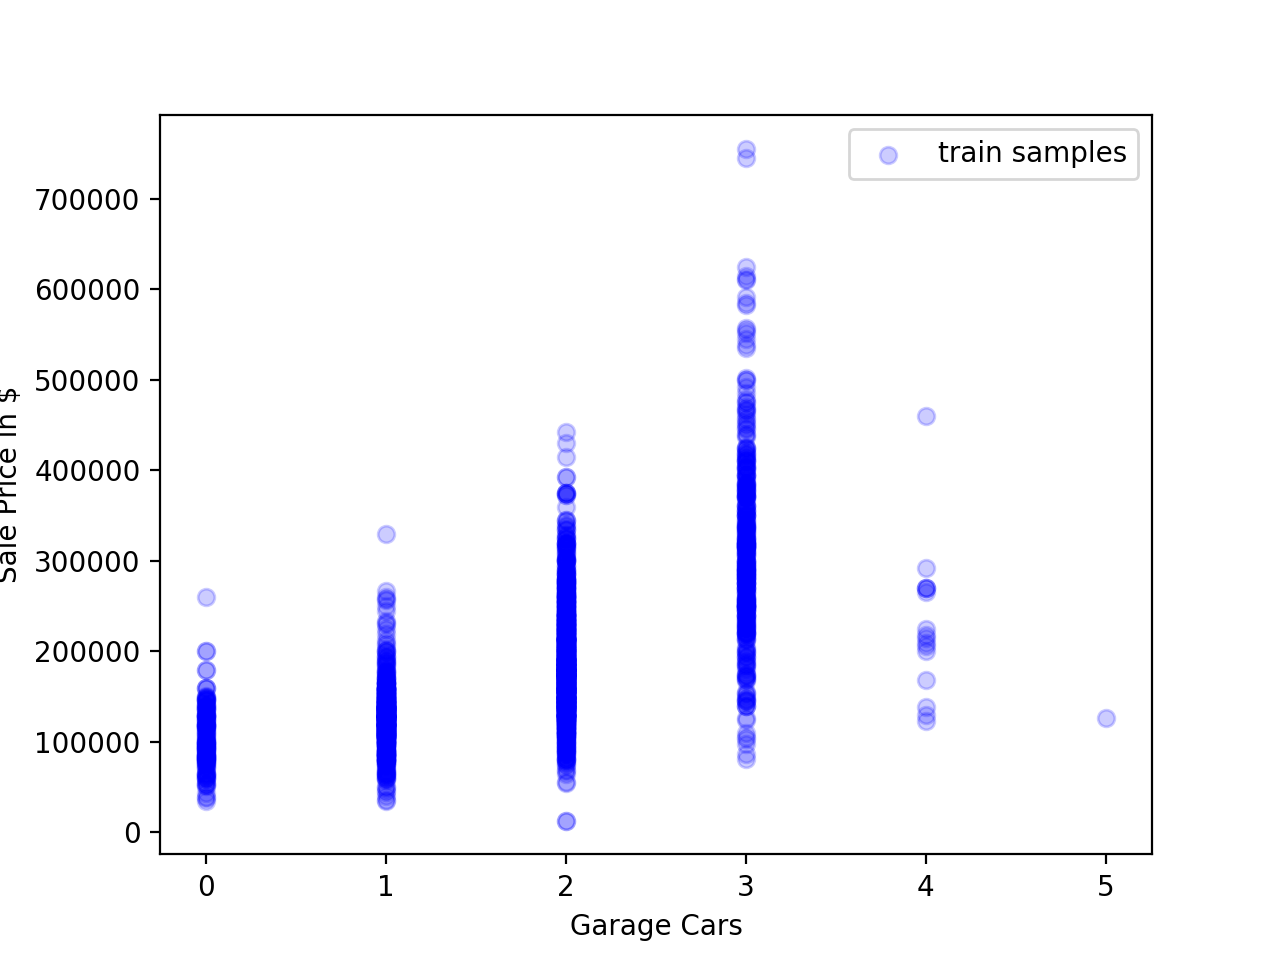

<IPython.core.display.Javascript object>


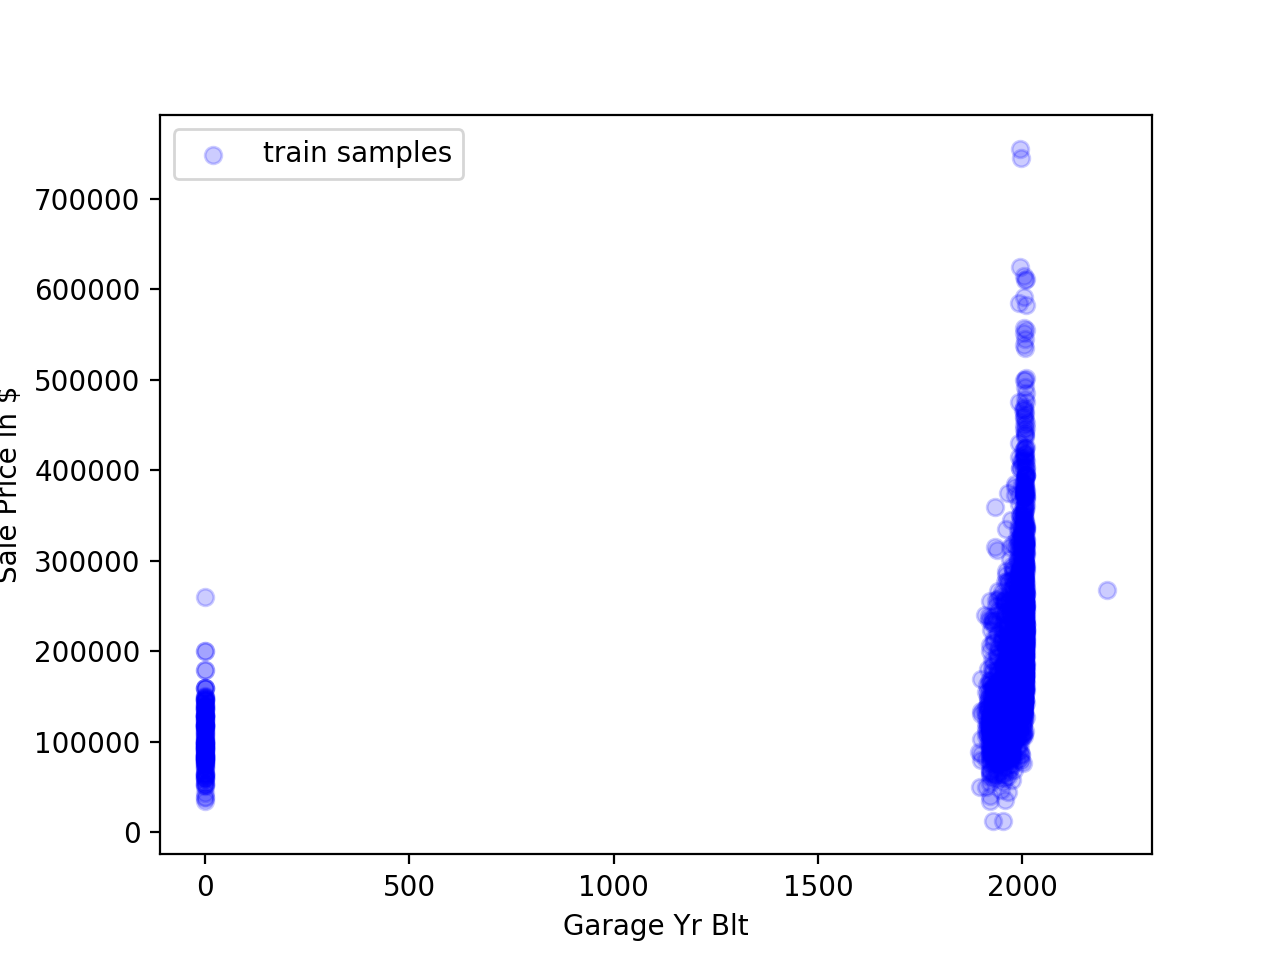

<IPython.core.display.Javascript object>


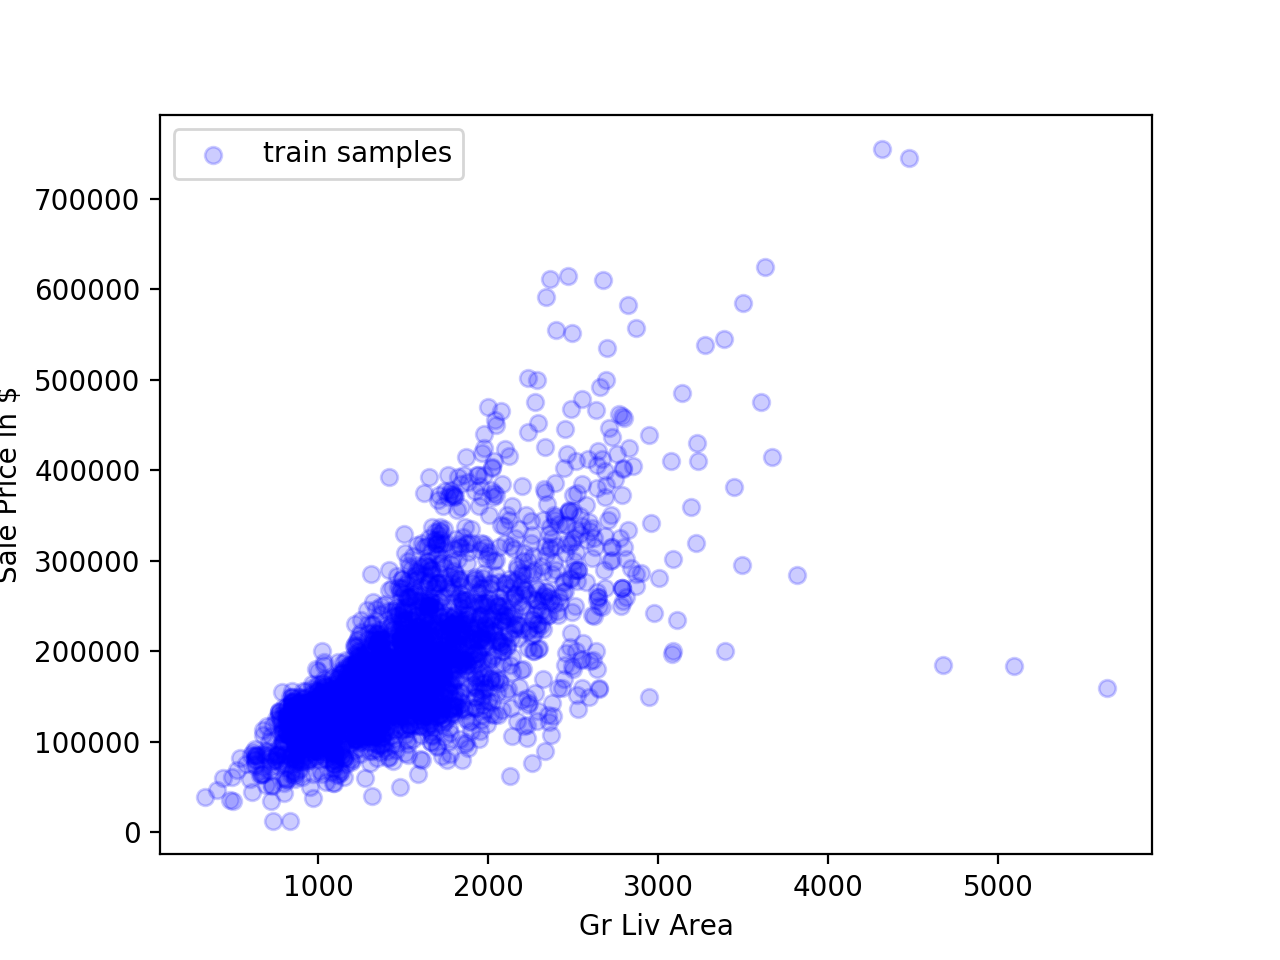

<IPython.core.display.Javascript object>


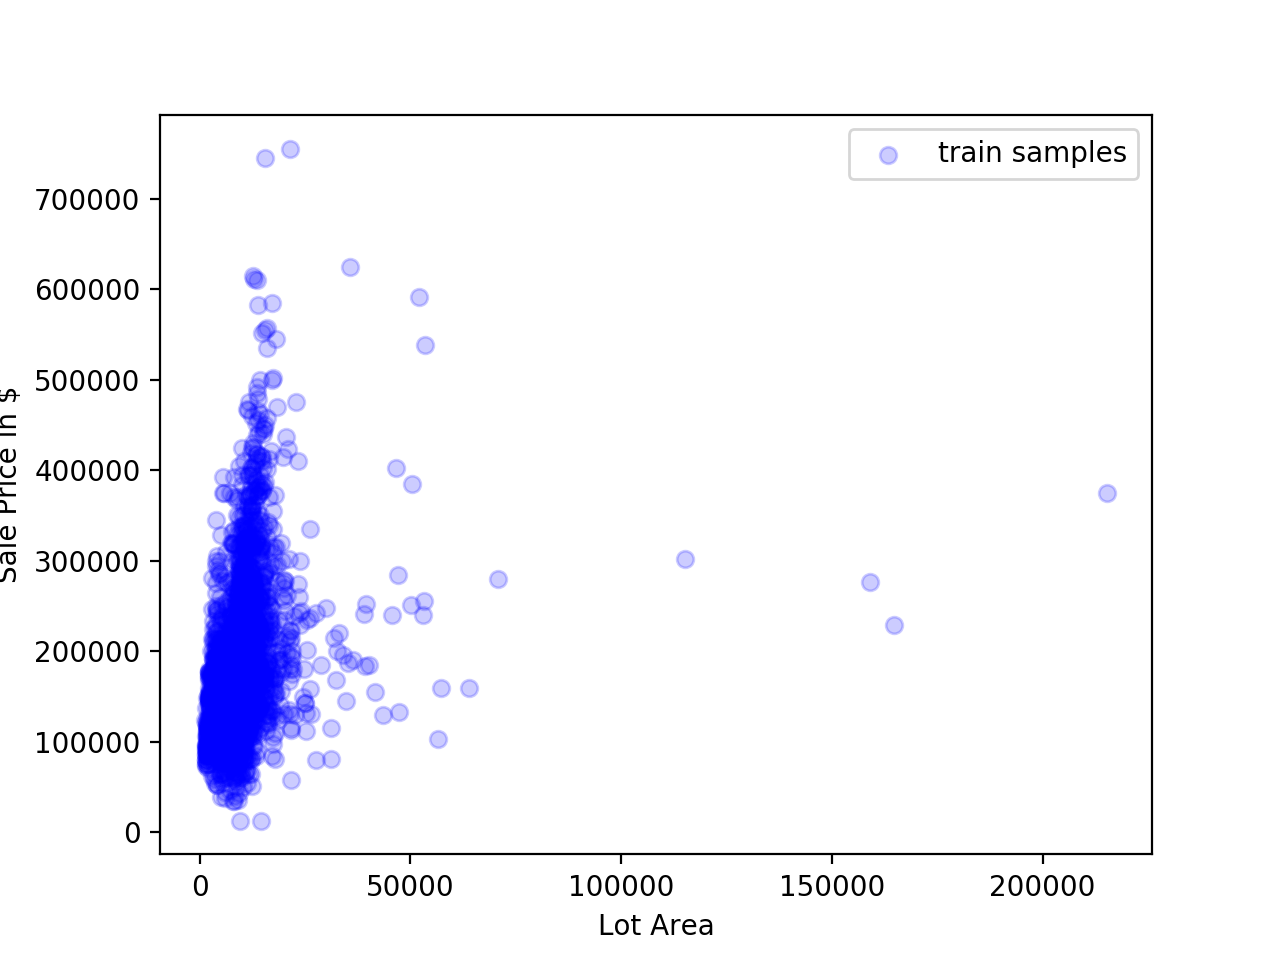

<IPython.core.display.Javascript object>


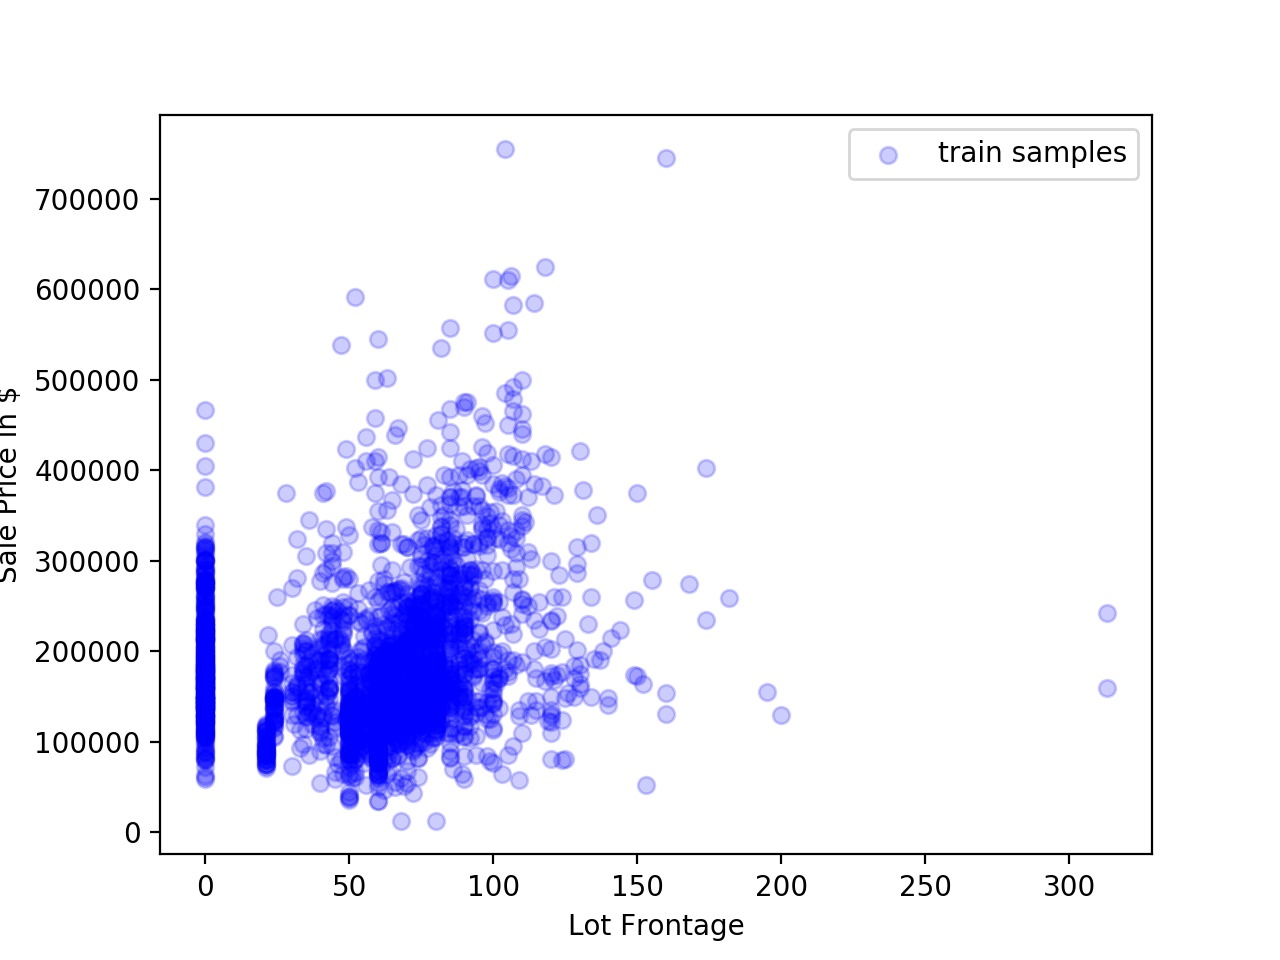

<IPython.core.display.Javascript object>


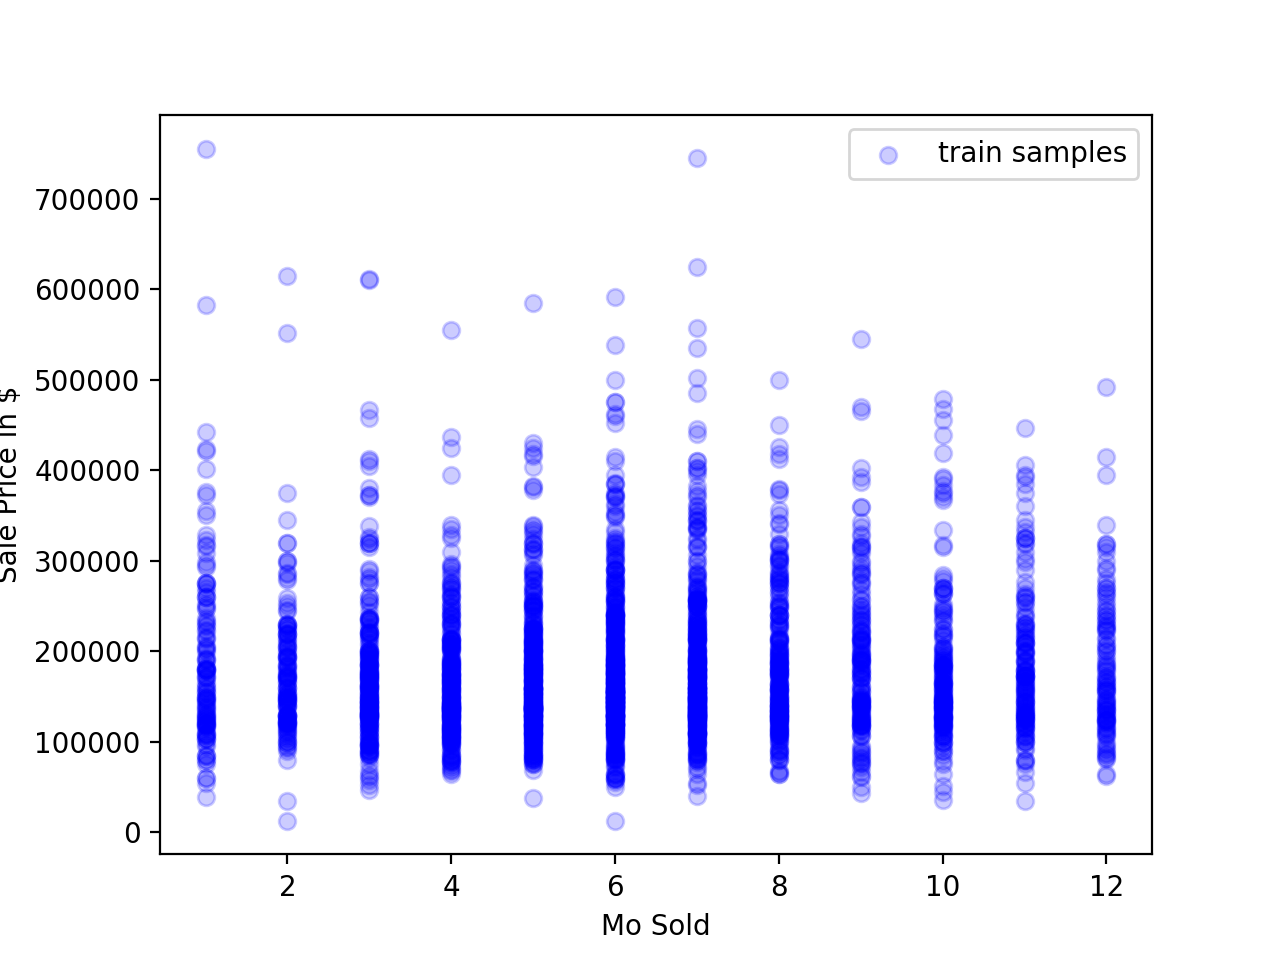

<IPython.core.display.Javascript object>


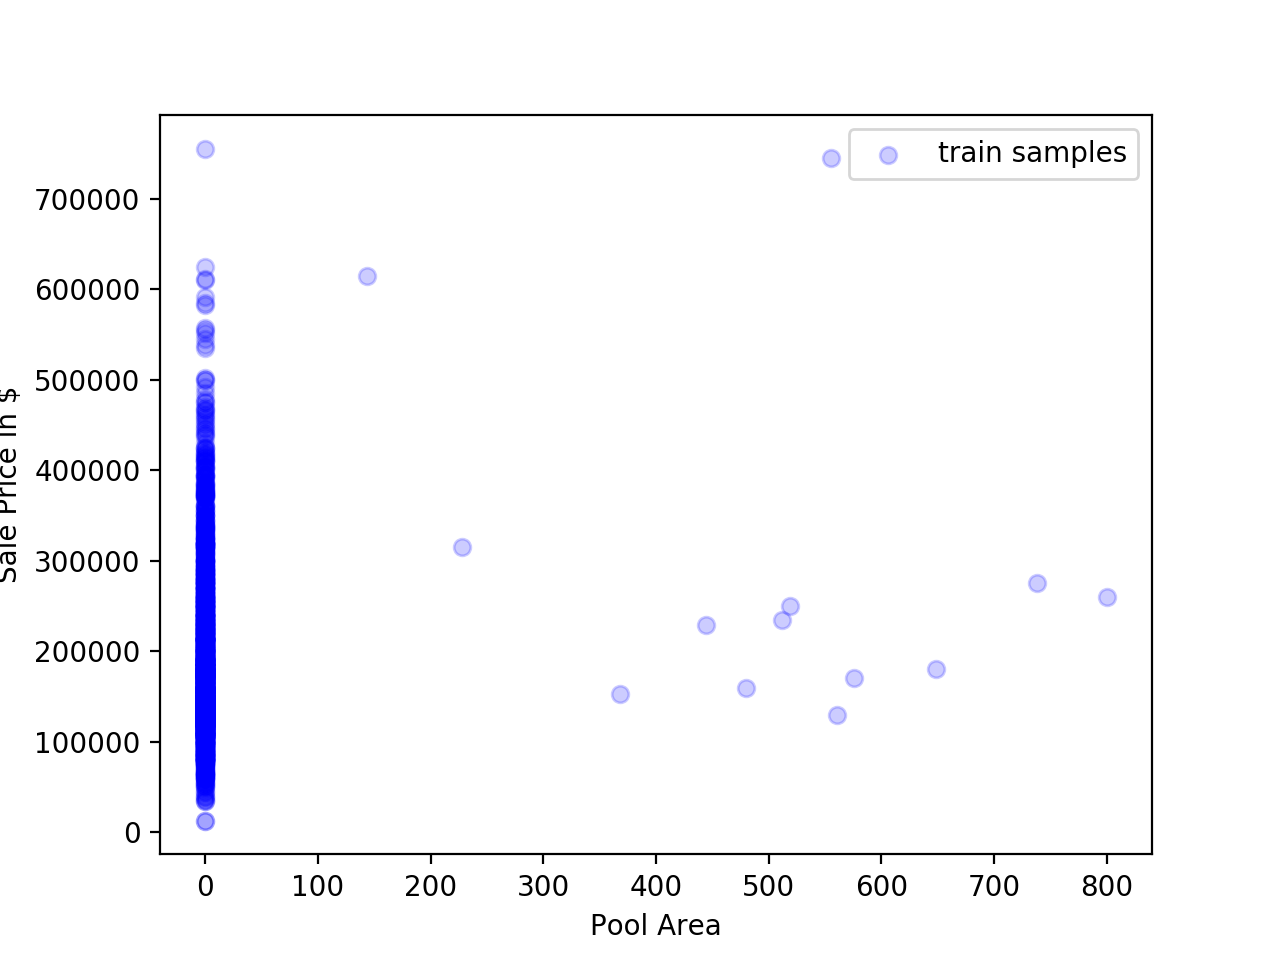

<IPython.core.display.Javascript object>


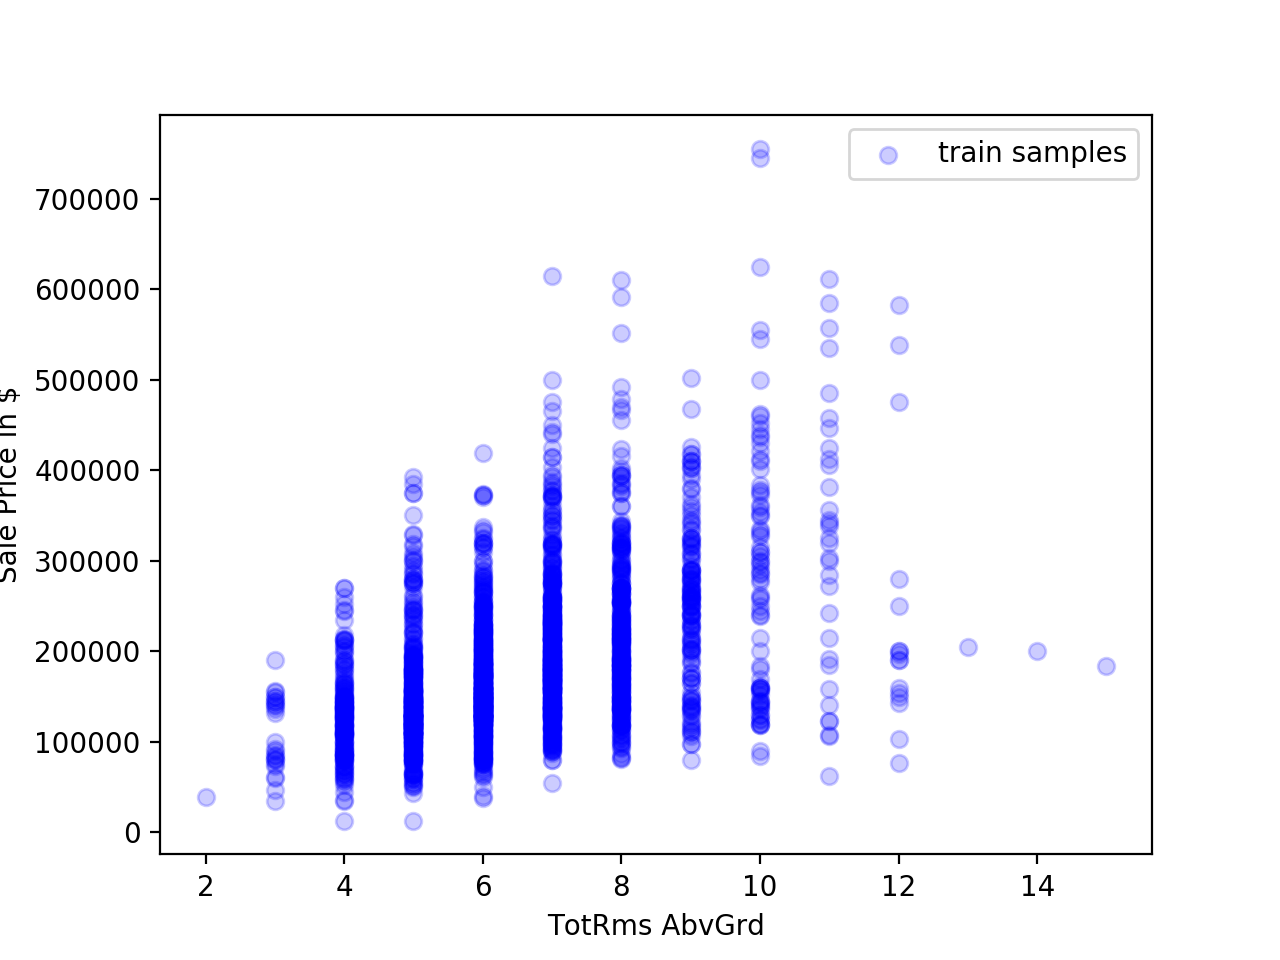

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


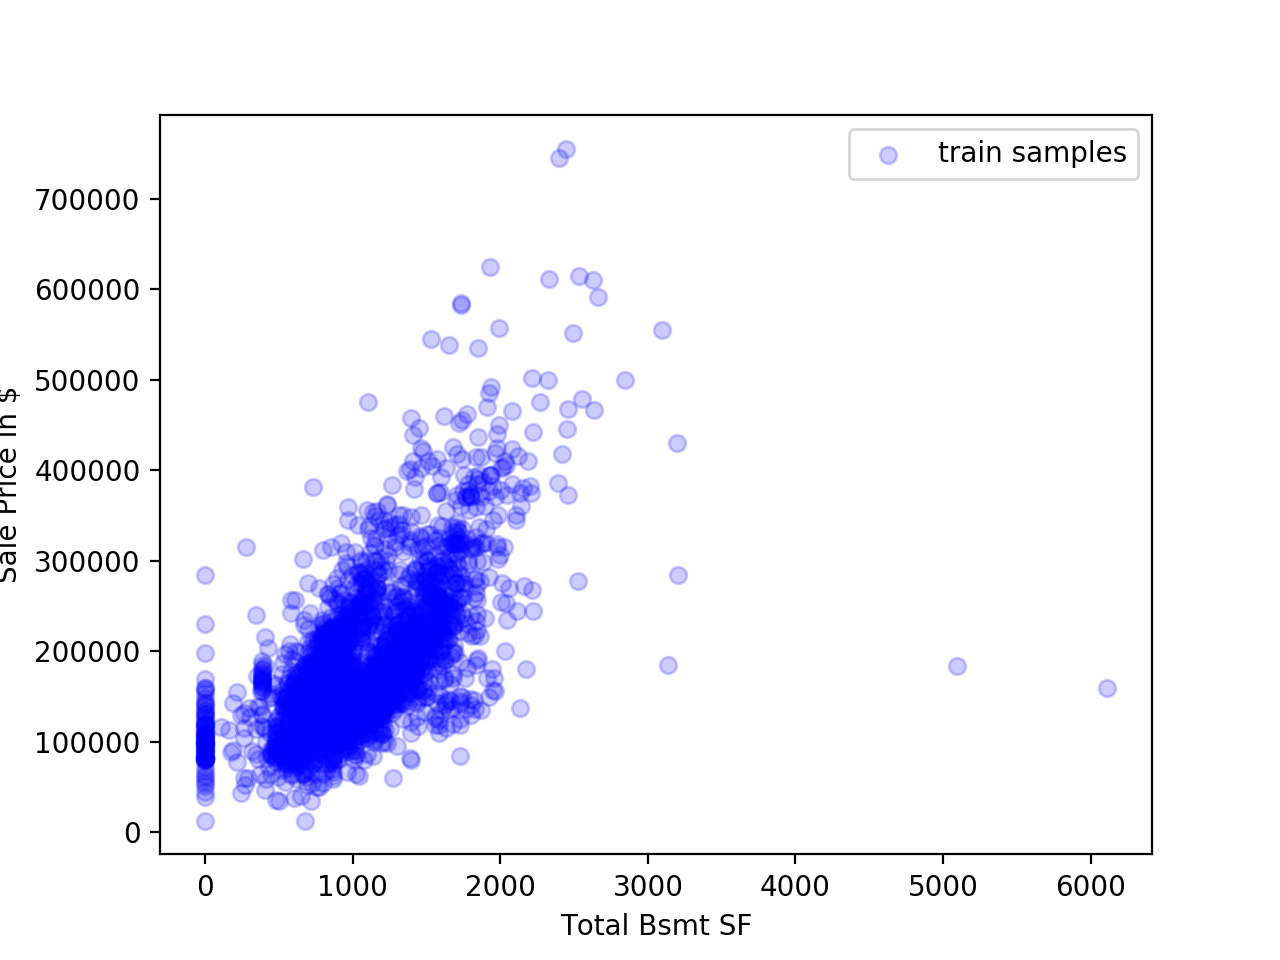

<IPython.core.display.Javascript object>


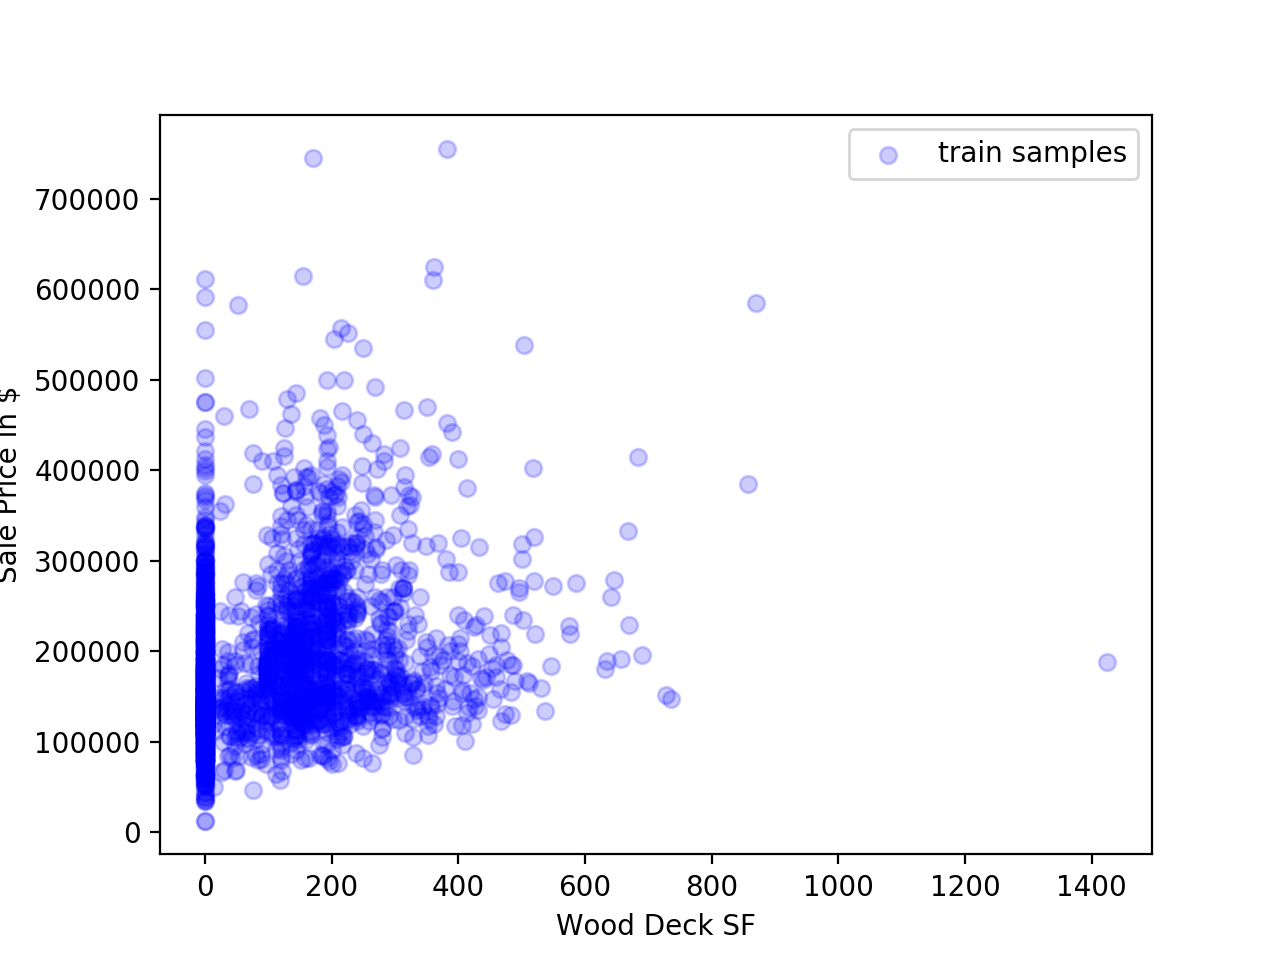

<IPython.core.display.Javascript object>


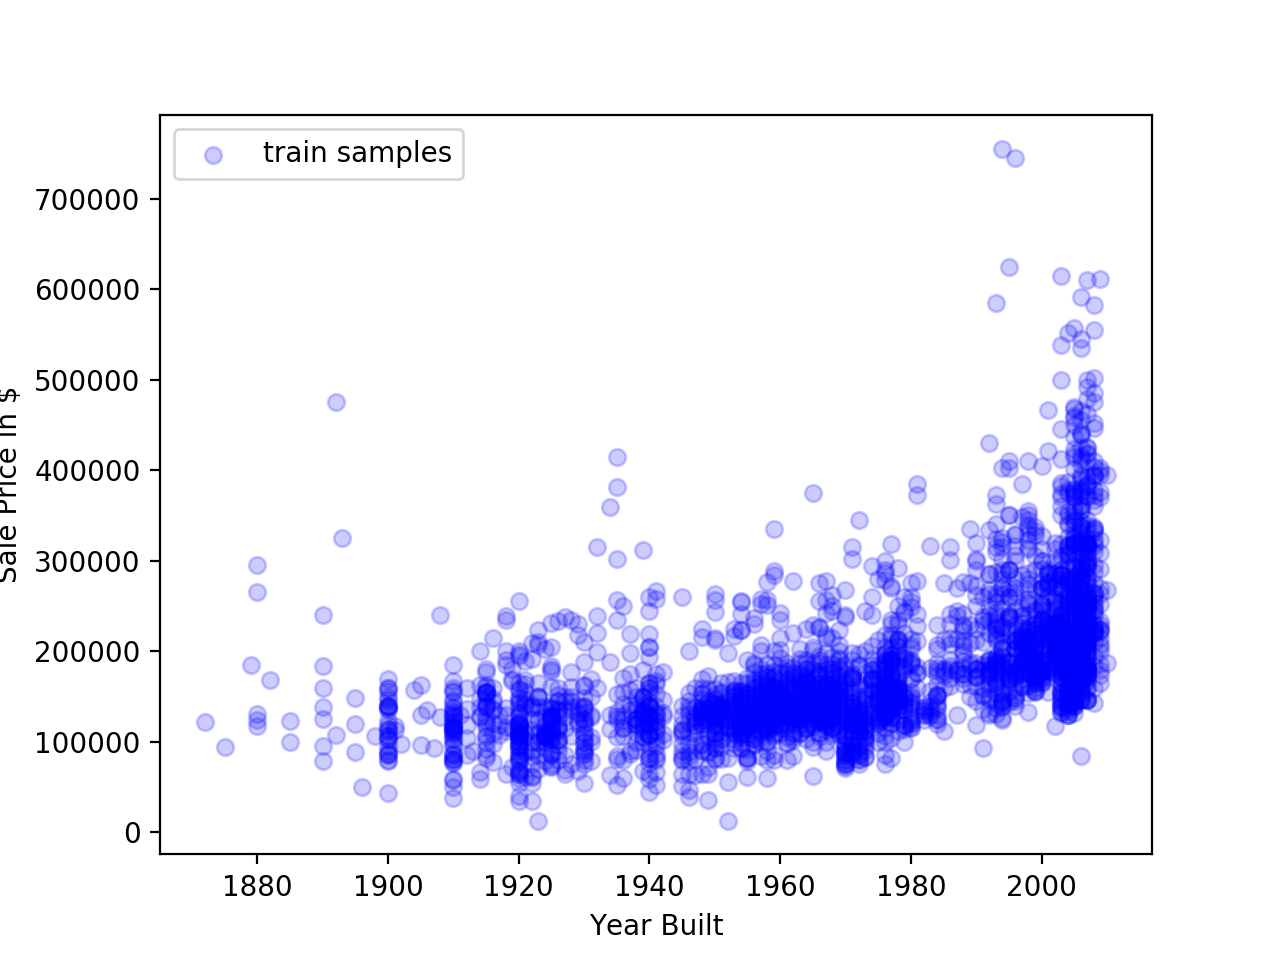

<IPython.core.display.Javascript object>


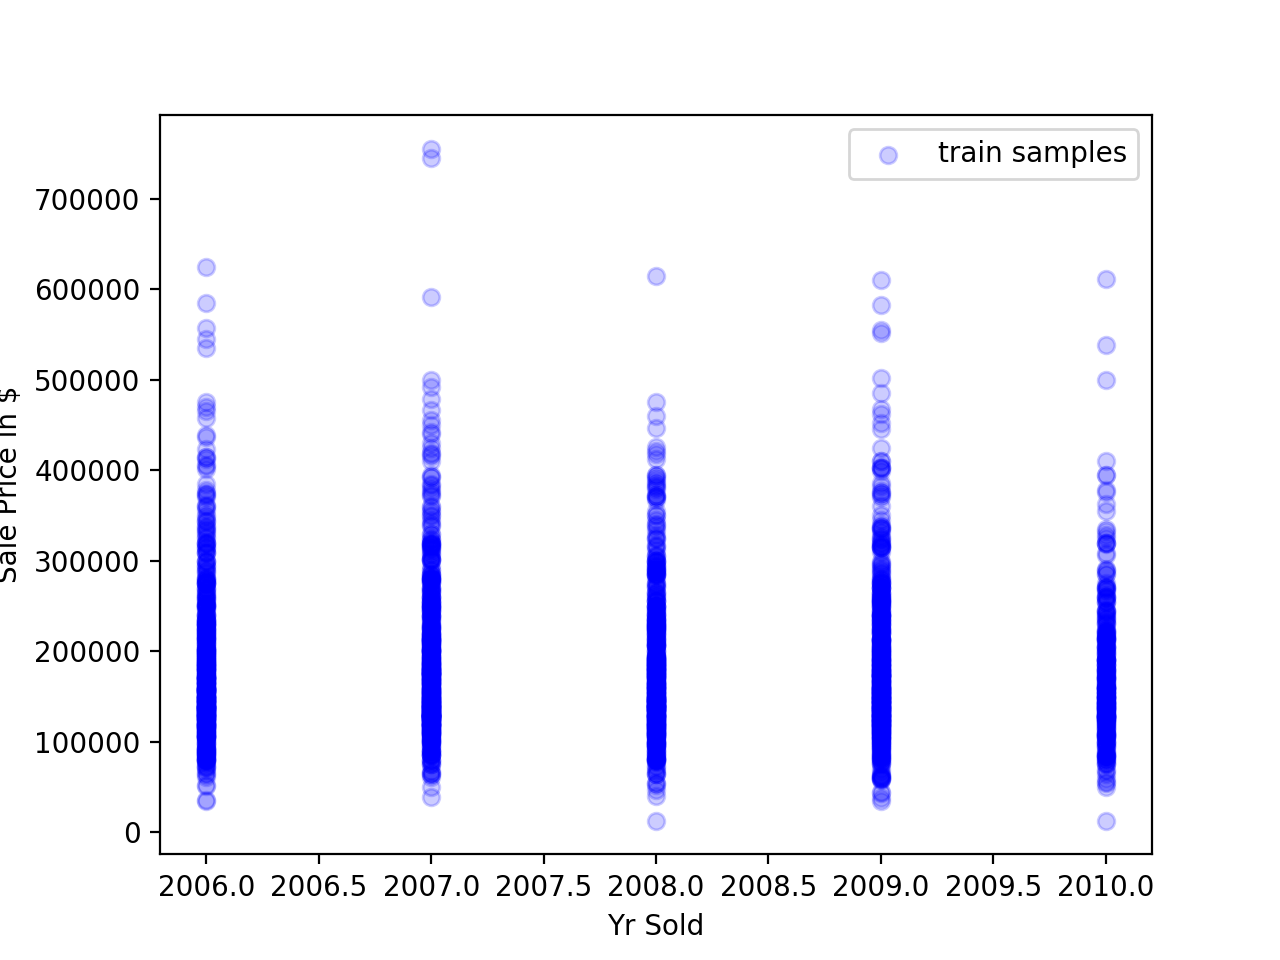

In [21]:
# Notes:
# Data not strongly correllate
# remove 'Bsmt Unf SF',
# adjust 'Garage Yr Blt' - notice poor logic of replacing NA values with 0 - created outliers/data scaling issue
# watch out for scaling - Lot Area
%matplotlib notebook
# How many columns do we have?
print(len(columns))

# for each feature, show how it relates to sales price
for i in range(0,len(columns)):
    # by specifying a figure, the plotter will create multiple figures
    plt.figure(i)
    plt.scatter(X_NN[:,i], Y, alpha=.2, color='blue', label='train samples')
#     plt.scatter(housing_X_train[:,i], housing_Y_train, alpha=.3, color='black', label='train samples')
#     plt.scatter(housing_X_test[:,i], housing_Y_test, alpha=.3, color='red', label='test samples')
#     plt.scatter(housing_X_test[:,i], housing_Y_pred_nn,color='magenta', linewidth=1, alpha=.5, label='predictions')

    plt.xticks()
    plt.yticks()
    plt.legend()
    plt.xlabel(columns[i])
    plt.ylabel('Sale Price in $')

    plt.show();

## Which Features Are Useful?
## Which Features Are Not?
Let's remove all of the features that seem less useful and run it again...

Just go up to the cell that has our feature columns and comment out (command+/) any fields you want to remove.

What's the best score you can get?

## Next Up
[Where Do You Go From Here?](/notebooks/07%20-%20From%20Here.ipynb)